<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Good-Enough-workflow!" data-toc-modified-id="Good-Enough-workflow!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Good Enough workflow!</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Duplicates" data-toc-modified-id="Drop-Duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Duplicates</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>missing values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#waterfront" data-toc-modified-id="waterfront-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#view" data-toc-modified-id="view-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>view</a></span></li><li><span><a href="#yr_renovated" data-toc-modified-id="yr_renovated-2.2.0.3"><span class="toc-item-num">2.2.0.3&nbsp;&nbsp;</span>yr_renovated</a></span></li></ul></li><li><span><a href="#Recheck-Nan-values" data-toc-modified-id="Recheck-Nan-values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Recheck Nan values</a></span></li></ul></li><li><span><a href="#Create-Usable-(not-necessarily-final)-datatypes" data-toc-modified-id="Create-Usable-(not-necessarily-final)-datatypes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Usable (not necessarily final) datatypes</a></span><ul class="toc-item"><li><span><a href="#Drop-date-(look-for-trend-later-if-there-is-time)" data-toc-modified-id="Drop-date-(look-for-trend-later-if-there-is-time)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Drop date (look for trend later if there is time)</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>sqft_basement</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Tools" data-toc-modified-id="Tools-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Iterate-the-model" data-toc-modified-id="Iterate-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Iterate the model</a></span><ul class="toc-item"><li><span><a href="#bedrooms" data-toc-modified-id="bedrooms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>bedrooms</a></span></li><li><span><a href="#bathrooms" data-toc-modified-id="bathrooms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>bathrooms</a></span></li><li><span><a href="#sqft-_living" data-toc-modified-id="sqft-_living-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>sqft _living</a></span></li><li><span><a href="#sqft_lot" data-toc-modified-id="sqft_lot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>sqft_lot</a></span></li><li><span><a href="#Floors" data-toc-modified-id="Floors-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Floors</a></span></li><li><span><a href="#waterfront" data-toc-modified-id="waterfront-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#view" data-toc-modified-id="view-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>view</a></span></li><li><span><a href="#condition" data-toc-modified-id="condition-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>condition</a></span></li><li><span><a href="#grade" data-toc-modified-id="grade-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>grade</a></span></li><li><span><a href="#lat" data-toc-modified-id="lat-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>lat</a></span></li><li><span><a href="#sqft_above---no-change" data-toc-modified-id="sqft_above---no-change-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>sqft_above - no change</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>sqft_basement</a></span></li><li><span><a href="#sqft_living15" data-toc-modified-id="sqft_living15-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>sqft_living15</a></span></li><li><span><a href="#sqft_lot15" data-toc-modified-id="sqft_lot15-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>sqft_lot15</a></span></li><li><span><a href="#yr_built" data-toc-modified-id="yr_built-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>yr_built</a></span></li><li><span><a href="#yr_renovated" data-toc-modified-id="yr_renovated-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>yr_renovated</a></span></li><li><span><a href="#zipcode" data-toc-modified-id="zipcode-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>zipcode</a></span><ul class="toc-item"><li><span><a href="#all-zips-as-categories" data-toc-modified-id="all-zips-as-categories-4.17.1"><span class="toc-item-num">4.17.1&nbsp;&nbsp;</span>all zips as categories</a></span></li><li><span><a href="#By-county" data-toc-modified-id="By-county-4.17.2"><span class="toc-item-num">4.17.2&nbsp;&nbsp;</span>By county</a></span></li><li><span><a href="#binning-by-median-sale-price" data-toc-modified-id="binning-by-median-sale-price-4.17.3"><span class="toc-item-num">4.17.3&nbsp;&nbsp;</span>binning by median sale price</a></span></li><li><span><a href="#bin-zipcodes-by-median-price/sqft_living" data-toc-modified-id="bin-zipcodes-by-median-price/sqft_living-4.17.4"><span class="toc-item-num">4.17.4&nbsp;&nbsp;</span>bin zipcodes by median price/sqft_living</a></span></li></ul></li><li><span><a href="#Check-correlations-and-multicolinearity" data-toc-modified-id="Check-correlations-and-multicolinearity-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>Check correlations and multicolinearity</a></span><ul class="toc-item"><li><span><a href="#sqft_living-vs-sqft_above" data-toc-modified-id="sqft_living-vs-sqft_above-4.18.1"><span class="toc-item-num">4.18.1&nbsp;&nbsp;</span>sqft_living vs sqft_above</a></span></li></ul></li><li><span><a href="#sqft--sqft_living15" data-toc-modified-id="sqft--sqft_living15-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span>sqft  sqft_living15</a></span></li><li><span><a href="#grade---sqft_living" data-toc-modified-id="grade---sqft_living-4.20"><span class="toc-item-num">4.20&nbsp;&nbsp;</span>grade - sqft_living</a></span></li><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-4.21"><span class="toc-item-num">4.21&nbsp;&nbsp;</span>Multicolinearity</a></span><ul class="toc-item"><li><span><a href="#lat/long" data-toc-modified-id="lat/long-4.21.1"><span class="toc-item-num">4.21.1&nbsp;&nbsp;</span>lat/long</a></span></li></ul></li></ul></li><li><span><a href="#Model-Assumptions" data-toc-modified-id="Model-Assumptions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Assumptions</a></span></li></ul></div>

# Good Enough workflow!


# Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

from scipy.stats import shapiro

pd.options.display.max_columns = 100
pd.options.display.max_columns = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import HTML


In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
len(df)

21597

## Drop Duplicates

In [4]:
df.duplicated().sum()

0

In [5]:
df.index.duplicated().sum()

177

In [6]:
df[df.index.duplicated(keep='last')].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [7]:
# Duplicates are houses that sold twice in a year.  Drop the first.
df = df[~df.index.duplicated(keep='last')]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
len(df)

21420

## missing values

In [9]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### waterfront

In [10]:
df.waterfront.value_counts()

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [11]:
# Fill waterfront Nan with 0 (the median)
df['waterfront'] = df['waterfront'].fillna(0)

In [12]:
df['waterfront'].isna().sum()

0

#### view

In [13]:
df.view.value_counts()

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [14]:
df.view.isna().sum()

63

In [15]:
# Fill with 0 which is far more than half the values
df['view'] = df['view'].fillna(0)

In [16]:
df['view'].isna().sum()

0

#### yr_renovated

In [17]:
df['yr_renovated'].value_counts().head()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [18]:
df['yr_renovated'].isna().sum()

3813

In [19]:
df['yr_renovated'].median()

0.0

In [20]:
# fill with 0 which seems to have the same meaning, no renovation and is also the median of the sample.

In [21]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [22]:
df['yr_renovated'].isna().sum()

0

### Recheck Nan values

In [23]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Create Usable (not necessarily final) datatypes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  float64
 8   view           21420 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float

### Drop date (look for trend later if there is time)
Date is not usable in an obvious way.  If there is time we can try to see if it improves one of our final models.  For now drop it.

In [25]:
df.drop(columns=['date'], inplace=True)

### sqft_basement

In [26]:
# why is the dtype object
df['sqft_basement'].value_counts(normalize = True).head()

0.0      0.593651
?        0.021102
600.0    0.010084
500.0    0.009617
700.0    0.009617
Name: sqft_basement, dtype: float64

In [27]:
# Replace the question mark with the median (0 because more than 50% of records are 0)
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)
df['sqft_basement'].value_counts().head()

0      13168
600      216
700      206
500      206
800      201
Name: sqft_basement, dtype: int64

## Baseline Model

In [28]:
X = df.drop('price', axis=1)
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:12:35   Log-Likelihood:            -2.9200e+05
No. Observations:               21420   AIC:                         5.840e+05
Df Residuals:                   21401   BIC:                         5.842e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.549e+06   2.95e+06      2.222      0.026    7.72e+05    1.23e+07
bedrooms       -3.59e+04   1913.771    -18.760      0.000   -3.97e+04   -3.22e+04
bathrooms      4.218e+04   3280.968     12.855      0.000    3.57e+04    4.86e+04
sqft_living     103.1092     18.133      5.686      0.000      67.568     138.650
sqft_lot          0.1260      0.048      2.624      0.009       0.032       0.220
floors         6714.1016   3613.628      1.858      0.063    -368.879    1.38e+04
waterfront     6.178e+05   1.82e+04     34.009      0.000    5.82e+05    6.53e+05
view           5.315e+04   2131.390     24.936      0.000     4.9e+04    5.73e+04
condition      2.661e+04   2364.548     11.255      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2171.877     44.654      0.000    9.27e+04    1.01e+05
sqft_above       77.7383     18.123      4.290      0.000      42.216     113.260
sqft_basement    47.7989     17.960      2.661      0.008      12.595      83.003
yr_built      -2651.5626     72.297    -36.676      0.000   -2793.269   -2509.856
yr_renovated     23.5391      3.994      5.893      0.000      15.710      31.368
zipcode        -583.6082     33.188    -17.585      0.000    -648.660    -518.557
lat            6.016e+05   1.08e+04     55.766      0.000     5.8e+05    6.23e+05
long          -2.177e+05   1.32e+04    -16.467      0.000   -2.44e+05   -1.92e+05
sqft_living15    20.9821      3.464      6.057      0.000      14.192      27.772
sqft_lot15       -0.3864      0.073     -5.258      0.000      -0.530      -0.242
==============================================================================
Omnibus:                    18208.361   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1821789.758
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      47.613   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
data_preprocessed = df

# Tools

In [30]:
def cross_validate_rmse(X, y, cv=5):
    '''Returnes Test RMSE, Train RMSE'''
    linreg = LinearRegression()

    mse = make_scorer(mean_squared_error)
    cvs = cross_validate(linreg, X, y, cv=5,    
                          scoring=mse, return_train_score=True)
    
    train_rmse = np.sqrt(cvs['train_score']).mean()
    test_rmse= np.sqrt(cvs['test_score']).mean()
    return  train_rmse, test_rmse, test_rmse - train_rmse

In [31]:
## Test it on the baseline model
cross_validate_rmse(X, y)

(201209.51242025438, 202862.45144721467, 1652.9390269602882)

In [32]:
# a quick way to run a model, perform crossfold validation and get the results.

models = {}
def quicktest(X, y, name=None):
    
    rmses = cross_validate_rmse(X, y)
                        
    model = sm.OLS(y, sm.add_constant(X)).fit()
                            
    summary = {'r2_adjusted': model.rsquared_adj,
               'train_rmse': rmses[0], 
               'test_rmse': rmses[1], 
               'diff_rmse': rmses[2]}
    
    if name is not None:
        models[name] = summary
        
    return summary
    

In [33]:
quicktest(X, y, name='baseline')

{'r2_adjusted': 0.69950880393774,
 'train_rmse': 201209.51242025438,
 'test_rmse': 202862.45144721467,
 'diff_rmse': 1652.9390269602882}

In [34]:
# pretty print the models and sort by rmse

def model_report():
    df = pd.DataFrame(models).T
    df.columns = ['r2_adjusted','test_rmse','train_rmse','diff_rmse']
    df.sort_values(by='r2_adjusted')
    return df

In [35]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,1652.939027,0.699509,202862.451447,201209.51242


# Iterate the model

Create a new model based on modifications to individual variables.  Use a new df each iteration so we don't have to re-run the whole notebook after any errors.

## bedrooms

In [36]:
beds = df.copy()

In [37]:
beds['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

It is interesting that there are more 6 bedroom houses than 1 bedroom houses.  Lets get rid of anything above 6 bedrooms.

In [38]:
# How many rows do we loose dropping houses with more than 6 bedrooms?
(beds['bedrooms'] > 6).sum()

62

In [39]:
# drop them
beds = beds[beds['bedrooms'] <=6]
beds['bedrooms'].value_counts()

3    9731
4    6849
2    2736
5    1586
6     265
1     191
Name: bedrooms, dtype: int64

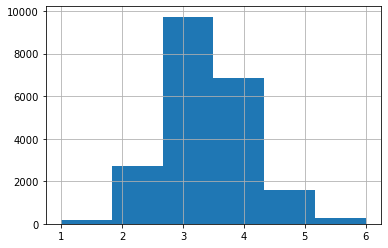

In [40]:
beds['bedrooms'].hist(bins=6)

The distribution looks pretty normal.  Lets test to see if the model performs with beds as a category or a continuous variable.

In [41]:
# model with beds as a continuous variable

X = beds.drop('price', axis =1)
y = beds['price']

quicktest(X, y)

{'r2_adjusted': 0.7002595308158148,
 'train_rmse': 199778.70702497,
 'test_rmse': 201306.85856672865,
 'diff_rmse': 1528.1515417586488}

In [42]:
# try with beds as categorical

dummies = pd.get_dummies(beds['bedrooms'], drop_first=True)
X = X.combine_first(dummies)
X.drop('bedrooms', axis=1, inplace = True)

quicktest(X, y)

{'r2_adjusted': 0.7017035147045234,
 'train_rmse': 199274.66810454853,
 'test_rmse': 200828.89008935483,
 'diff_rmse': 1554.221984806296}

The difference is not significant.  The $R^2$ goes up, but the fit is worse.  **Keep bedrooms continuous.**


In [43]:
## Store the model
X = beds.drop('price', axis =1)
y = beds['price']

quicktest(X, y, '1 (Bedrooms Dropped)')

{'r2_adjusted': 0.7002595308158148,
 'train_rmse': 199778.70702497,
 'test_rmse': 201306.85856672865,
 'diff_rmse': 1528.1515417586488}

In [44]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542


## bathrooms

In [45]:
baths = beds.copy()

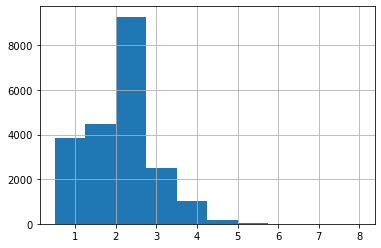

In [46]:
baths['bathrooms'].hist()

In [47]:
baths['bathrooms'].value_counts().sort_index()

0.50       4
0.75      70
1.00    3793
1.25       9
1.50    1427
1.75    3019
2.00    1912
2.25    2028
2.50    5349
2.75    1176
3.00     738
3.25     584
3.50     723
3.75     152
4.00     126
4.25      77
4.50      94
4.75      21
5.00      20
5.25      12
5.50       9
5.75       3
6.00       5
6.25       2
6.50       2
6.75       1
7.75       1
8.00       1
Name: bathrooms, dtype: int64

In [48]:
# drop everything above 5 bathrooms.  There aren't that many and we are interested in smaller flippable homes.
baths = baths[baths['bathrooms'] <=5]
baths['bathrooms'].value_counts().sort_index()

0.50       4
0.75      70
1.00    3793
1.25       9
1.50    1427
1.75    3019
2.00    1912
2.25    2028
2.50    5349
2.75    1176
3.00     738
3.25     584
3.50     723
3.75     152
4.00     126
4.25      77
4.50      94
4.75      21
5.00      20
Name: bathrooms, dtype: int64

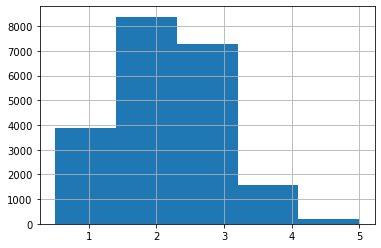

In [49]:
baths['bathrooms'].hist(bins=5)

In [50]:
# model with bathrooms as a continuous variable

X = baths.drop('price', axis =1)
y = baths['price']

quicktest(X, y)

{'r2_adjusted': 0.7021772246574098,
 'train_rmse': 188772.42656092902,
 'test_rmse': 190028.7840653862,
 'diff_rmse': 1256.3575044571771}

In [51]:
# try with beds as categorical

dummies = pd.get_dummies(baths['bathrooms'], drop_first=True)
X = X.combine_first(dummies)
X.drop('bathrooms', axis=1, inplace = True)

quicktest(X, y)

{'r2_adjusted': 0.716119685719599,
 'train_rmse': 184192.46240933688,
 'test_rmse': 185818.92888817246,
 'diff_rmse': 1626.4664788355876}

In [52]:
# Try group the bathrooms together regardless of size.
temp_df = baths.copy()
temp_df['bathroom_count'] = (temp_df['bathrooms'] // 1) + (np.ceil(temp_df['bathrooms'] % 1))
temp_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathroom_count
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,3.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,1.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,3.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0


In [53]:
dummies = pd.get_dummies(temp_df['bathroom_count'], prefix='baths', drop_first=True)
temp_df = temp_df.combine_first(dummies)
temp_df

,bathroom_count,bathrooms,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,1.00,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,3.0,2.25,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125
5631500400,1.0,1.00,0.0,0.0,0.0,0.0,2,3,1.0,6,47.7379,-122.233,180000.0,770,0,770,2720,10000,8062,0.0,0.0,1933,0.0,98028
2487200875,3.0,3.00,0.0,1.0,0.0,0.0,4,5,1.0,7,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,5000,0.0,0.0,1965,0.0,98136
1954400510,2.0,2.00,1.0,0.0,0.0,0.0,3,3,1.0,8,47.6168,-122.045,510000.0,1680,0,1680,1800,8080,7503,0.0,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3.0,2.50,0.0,1.0,0.0,0.0,3,3,3.0,8,47.6993,-122.346,360000.0,1530,0,1530,1530,1131,1509,0.0,0.0,2009,0.0,98103
6600060120,3.0,2.50,0.0,1.0,0.0,0.0,4,3,2.0,8,47.5107,-122.362,400000.0,2310,0,2310,1830,5813,7200,0.0,0.0,2014,0.0,98146
1523300141,1.0,0.75,0.0,0.0,0.0,0.0,2,3,2.0,7,47.5944,-122.299,402101.0,1020,0,1020,1020,1350,2007,0.0,0.0,2009,0.0,98144


In [54]:
X = temp_df.drop(columns=['price', 'bathrooms', 'bathroom_count'])

quicktest(X, y)

{'r2_adjusted': 0.7128107238264638,
 'train_rmse': 185371.1441774164,
 'test_rmse': 186517.09038589982,
 'diff_rmse': 1145.946208483423}

In [55]:
X.head(2)

,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,
7129300520,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125


In [56]:
baths

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [57]:
# Try full vs partial baths

# Try group the bathrooms together regardless of size.

y = baths['price']
X = baths.copy()
X['baths_full'] = X['bathrooms'] // 1
X['baths_partial'] = np.ceil(X['bathrooms'] % 1)
X.drop(columns=['price', 'bathrooms'], inplace = True)
X.head(2)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0,0.0
6414100192,3,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,1.0


In [58]:
quicktest(X, y)


{'r2_adjusted': 0.7041857896640364,
 'train_rmse': 188131.8239856115,
 'test_rmse': 189368.63442949863,
 'diff_rmse': 1236.8104438871378}

For our use case it would be more convenient to be able to talk about the value of an additional bathroom or partial bathroom than the value of the 3rd or 4th bathroom so we will use keep this iteration

In [59]:
baths['baths_full'] = baths['bathrooms'] // 1
baths['baths_partial'] = np.ceil(baths['bathrooms'] % 1)
baths = baths.drop('bathrooms', axis=1)
y = baths['price']
X = baths.drop(columns=['price'])
X.head(2)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0,0.0
6414100192,3,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,1.0


In [60]:
quicktest(X, y, name='2 (Bathrooms dropped and divided)')

{'r2_adjusted': 0.7041857896640364,
 'train_rmse': 188131.8239856115,
 'test_rmse': 189368.63442949863,
 'diff_rmse': 1236.8104438871378}

In [61]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444


## sqft _living

In [62]:
#start from where the last model left off
sl = baths.copy()

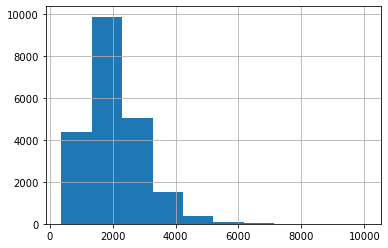

In [63]:
sl['sqft_living'].hist()

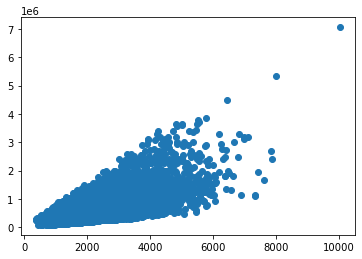

In [64]:
plt.scatter(sl['sqft_living'], sl['price'])

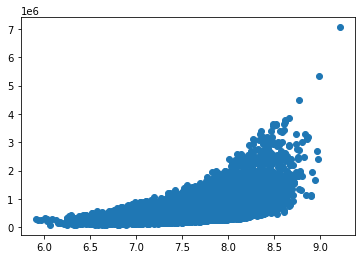

In [65]:
plt.scatter(np.log(sl['sqft_living']), sl['price'])

We can see that the data starts to get sparse somewhere between 5k and 6k.  Having less data will make our predictions in that range less accurate.  Lets drop above 6k sqft and see what it does to our model.

In [66]:
X = sl[sl['sqft_living'] <= 6000].copy()
y = X['price']
X.drop(['price'], axis=1, inplace=True)

quicktest(X, y)

{'r2_adjusted': 0.7015668211196139,
 'train_rmse': 182238.13132479475,
 'test_rmse': 183549.6617867159,
 'diff_rmse': 1311.530461921153}

In [67]:
# try with the dropped rows and sqft_living log transformed
X=sl[sl['sqft_living'] <= 6000].copy()
y = X['price']
X['sqft_living_log'] = np.log(X['sqft_living'])
X.drop(columns=['price','sqft_living'], inplace=True)
quicktest(X, y)

{'r2_adjusted': 0.7109990679752038,
 'train_rmse': 179351.42717454658,
 'test_rmse': 180525.49066335935,
 'diff_rmse': 1174.063488812768}

In [68]:
# try with sqft_living log transformed
X=sl.copy()
X['sqft_living_log'] = np.log(sl['sqft_living'])
X.drop(columns = ['price', 'sqft_living'], inplace=True)
y = sl['price']
quicktest(X, y)

{'r2_adjusted': 0.7170756811101715,
 'train_rmse': 184001.82634944515,
 'test_rmse': 185134.54606007988,
 'diff_rmse': 1132.7197106347303}

We will remove the rows but not do the log transform because that is harder to explain to the stake holder.  If we do take the log of sqft we should take the log of all the sqft variables.

In [69]:
sl=sl[sl['sqft_living'] <= 6000].copy()
y = sl['price']
#sl['sqft_living_log'] = np.log(sl['sqft_living'])
#sl.drop('sqft_living', axis=1, inplace=True)

X = sl.drop(columns=['price'])
quicktest(X, y, name='3 (sqft_living outliers)')

{'r2_adjusted': 0.7015668211196139,
 'train_rmse': 182238.13132479475,
 'test_rmse': 183549.6617867159,
 'diff_rmse': 1311.530461921153}

In [70]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462


## sqft_lot

In [71]:
lot = sl.copy()

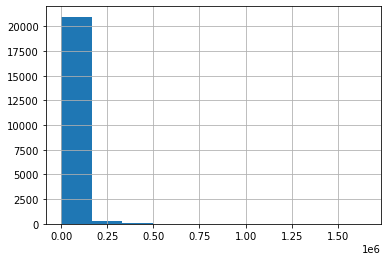

In [72]:
lot['sqft_lot'].hist()

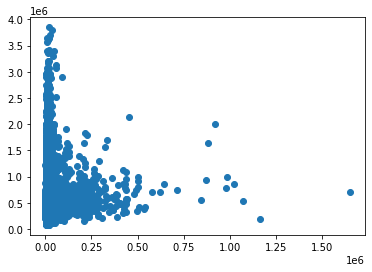

In [73]:
plt.scatter(lot['sqft_lot'], lot['price'])

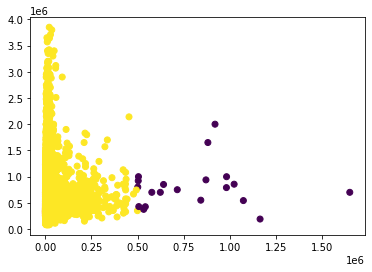

In [74]:
# drop the really big lots
color = [-1 if x > 500000 else 0 for x in lot['sqft_lot']]

plt.scatter(lot['sqft_lot'], lot['price'], c=color)

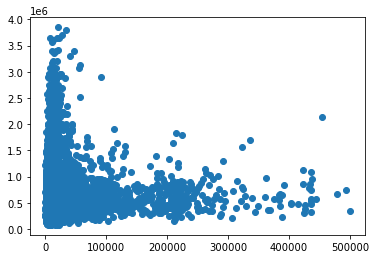

In [75]:
lot = lot[lot['sqft_lot'] < 500000]
plt.scatter(lot['sqft_lot'], lot['price'])

In [76]:
y = lot['price']
X = lot.drop(columns=['price'])
quicktest(X, y)

{'r2_adjusted': 0.7017515750745696,
 'train_rmse': 182078.76298046386,
 'test_rmse': 183429.92070532514,
 'diff_rmse': 1351.1577248612884}

That didn't really help.

Try log transform.

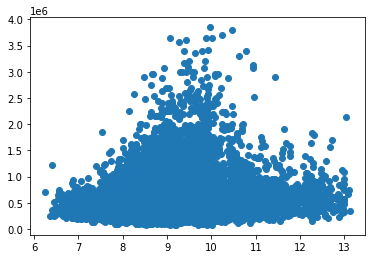

In [77]:
plt.scatter(np.log(lot['sqft_lot']), lot['price'])

(array([ 240.,  997., 2129., 8525., 6552., 1260.,  923.,  304.,  255.,
          79.]),
 array([ 6.25382881,  6.94059643,  7.62736405,  8.31413167,  9.00089929,
         9.68766691, 10.37443453, 11.06120215, 11.74796977, 12.43473739,
        13.12150501]),
 <a list of 10 Patch objects>)

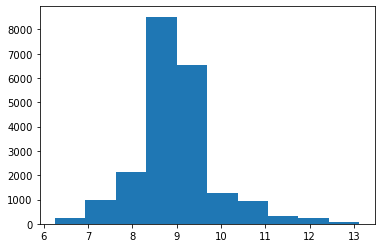

In [78]:
plt.hist(np.log(lot['sqft_lot']))

That is much more normal.  Check the model.

In [79]:
temp_df

,bathroom_count,bathrooms,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,1.00,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,3.0,2.25,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125
5631500400,1.0,1.00,0.0,0.0,0.0,0.0,2,3,1.0,6,47.7379,-122.233,180000.0,770,0,770,2720,10000,8062,0.0,0.0,1933,0.0,98028
2487200875,3.0,3.00,0.0,1.0,0.0,0.0,4,5,1.0,7,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,5000,0.0,0.0,1965,0.0,98136
1954400510,2.0,2.00,1.0,0.0,0.0,0.0,3,3,1.0,8,47.6168,-122.045,510000.0,1680,0,1680,1800,8080,7503,0.0,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3.0,2.50,0.0,1.0,0.0,0.0,3,3,3.0,8,47.6993,-122.346,360000.0,1530,0,1530,1530,1131,1509,0.0,0.0,2009,0.0,98103
6600060120,3.0,2.50,0.0,1.0,0.0,0.0,4,3,2.0,8,47.5107,-122.362,400000.0,2310,0,2310,1830,5813,7200,0.0,0.0,2014,0.0,98146
1523300141,1.0,0.75,0.0,0.0,0.0,0.0,2,3,2.0,7,47.5944,-122.299,402101.0,1020,0,1020,1020,1350,2007,0.0,0.0,2009,0.0,98144


In [80]:
temp_df = lot.copy()
temp_df['sqft_lot_log'] = np.log(temp_df['sqft_lot'])

X = temp_df.drop(columns=['price', 'sqft_lot'])
y = temp_df['price']

quicktest(X, y)

{'r2_adjusted': 0.7037805745046295,
 'train_rmse': 181472.92776219957,
 'test_rmse': 182655.14085088327,
 'diff_rmse': 1182.2130886836967}

In [81]:
# Check correlation between sqft_living and sqft_lot since we did the same transformations on them.
X[['sqft_living', 'sqft_lot_log']].corr()

,sqft_living,sqft_lot_log
sqft_living,1.000000,0.334742
sqft_lot_log,0.334742,1.000000


In [82]:
#save it

lot = temp_df.drop('sqft_lot', axis = 1)

quicktest(X, y, name='4 (sqft_lot outliers and log)')

{'r2_adjusted': 0.7037805745046295,
 'train_rmse': 181472.92776219957,
 'test_rmse': 182655.14085088327,
 'diff_rmse': 1182.2130886836967}

In [83]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089


Thats a tiny bit better.  Lets move on.

## Floors

In [84]:
floors = lot.copy()

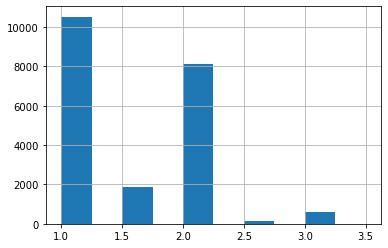

In [85]:
floors['floors'].hist()

I would say there is no such thing as half a floor.  Lets group these into the number of floors regardless of how much of the house the floor covers, and see if they perform better as continuous or categorical variables.

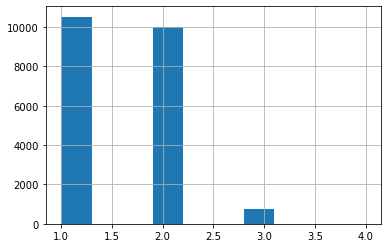

In [86]:
df1 = floors.copy()
df1['floor_count'] = np.ceil(df1['floors']).astype('int')
df1 = df1.drop(columns=['floors'])
df1['floor_count'].hist()

In [87]:
# How many have 4 floors?
df1[df1['floor_count'] > 3]

,price,bedrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial,sqft_lot_log,floor_count
id,,,,,,,,,,,,,,,,,,,,
1972202010,435000.0,3,1440,0.0,2.0,3,8,1440,0,2005,0.0,98103,47.6525,-122.345,1440,1350,3.0,0.0,7.207860,4
3180100023,544000.0,3,1760,0.0,0.0,3,8,1760,0,1998,0.0,98105,47.6688,-122.279,1700,1721,2.0,1.0,7.470224,4
8673400177,525000.0,3,1730,0.0,0.0,3,8,1730,0,2006,0.0,98107,47.6692,-122.392,1370,1185,3.0,0.0,6.979145,4
1702900664,479000.0,2,1730,0.0,0.0,3,8,1730,0,2008,0.0,98118,47.5594,-122.285,1280,1026,2.0,1.0,6.944087,4
1972200426,525000.0,2,1310,0.0,0.0,3,8,1310,0,2007,0.0,98103,47.6534,-122.355,1350,1288,2.0,1.0,7.145196,4
1972200428,563500.0,3,1400,0.0,0.0,3,8,1400,0,2007,0.0,98103,47.6534,-122.355,1350,1312,2.0,1.0,7.179308,4


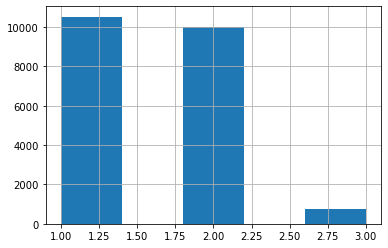

In [88]:
# drop them
df1 = df1[df1['floor_count'] < 4]
df1['floor_count'].hist(bins=5)

In [89]:
X = df1.drop(columns=['price'])
y = df1['price']

quicktest(X, y)

{'r2_adjusted': 0.70379931270649,
 'train_rmse': 181493.26332483967,
 'test_rmse': 182664.70011335533,
 'diff_rmse': 1171.4367885156535}

Thats an improvement.  Now lets see if its better as a categorical.

In [90]:
df2 = df1.copy()
dummies = pd.get_dummies(df2['floor_count'], prefix='floors', drop_first=True)
df2 = df2.combine_first(dummies)
df2 = df2.drop(columns=['floor_count'])
df2.head(2)

,baths_full,baths_partial,bedrooms,condition,floors_2,floors_3,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,0.0,0.0,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,1.0,0.0,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,1951,1991.0,98125


In [91]:
X = df2.drop(columns=['price'])
y = df2['price']

quicktest(X, y)

{'r2_adjusted': 0.7043310247215032,
 'train_rmse': 181325.52702882915,
 'test_rmse': 182475.7372545491,
 'diff_rmse': 1150.2102257199585}

There is no benefit to having floors as a categorical variable.

In [92]:
X = df1.drop(columns=['price'])
y = df1['price']

quicktest(X, y, name='5 (Floors -> floor count)')

{'r2_adjusted': 0.70379931270649,
 'train_rmse': 181493.26332483967,
 'test_rmse': 182664.70011335533,
 'diff_rmse': 1171.4367885156535}

In [93]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789


In [94]:
# save the final df for floors
floors = df1.copy()

## waterfront

In [95]:
wf = floors.copy()

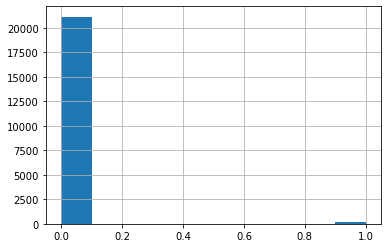

In [96]:
wf['waterfront'].hist()

Waterfront is already a categorical and looks fine.

## view

In [97]:
view = wf.copy()

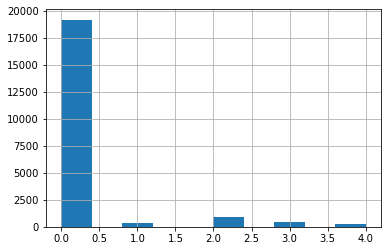

In [98]:
view['view'].hist()

(array([19531.,     0.,     0.,     0.,     0.,   937.,     0.,   491.,
            0.,   299.]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436]),
 <a list of 10 Patch objects>)

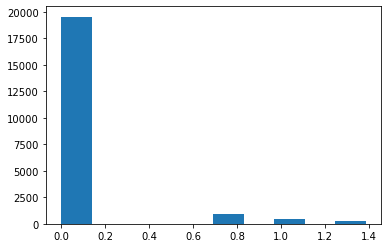

In [99]:
# test if view potentially have a non linear affect on price?

v_log = view['view'].map(lambda x: x if x == 0 else np.log(x))

plt.hist(v_log)

In [100]:
# that looks reasonable.  Test it.

df = view.copy()

# log transform view (add 1 to )
df['view_log'] = v_log
df = df.drop(columns = 'view')

X = df.drop(columns = ['price'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.702373491725766,
 'train_rmse': 181930.14406593418,
 'test_rmse': 183083.02054988936,
 'diff_rmse': 1152.8764839551877}

In [101]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789


Both RMSE and $R^2$ decreased.  Thats not good.


In [102]:
# Try view as a categorical
df = view.copy()

dummies = pd.get_dummies(view['view'].astype('int'),
                         drop_first=True, prefix='view')

df = df.combine_first(dummies)
df.drop(columns=['view'])
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


In [103]:
X = df.drop(columns = ['price', 'view'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7057241288961291,
 'train_rmse': 180879.5133204313,
 'test_rmse': 182175.45011572115,
 'diff_rmse': 1295.936795289861}

In [104]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789


This model has a higher $R^2$ and lower RMSE.  That is good but the difference between the test and train RMSE went up a little potentially indicating a worse fit.  Both differences are small.  At this point we haven't checked correlations so we can't trust the coefficients.  Lets keep the model treating view as a categorical.

In [105]:
# save results

#view = df.drop('view', axis=1)
#quicktest(X, y, name='6 (View as categorical)')


{'r2_adjusted': 0.7057241288961291,
 'train_rmse': 180879.5133204313,
 'test_rmse': 182175.45011572115,
 'diff_rmse': 1295.936795289861}

In [106]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


## condition

In [107]:
con = wf.copy()
con.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


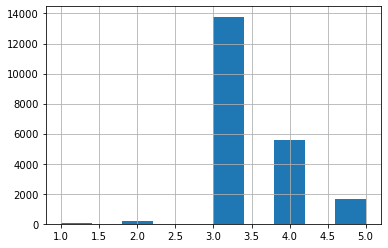

In [111]:
con['condition'].hist()

In [112]:
# try as a categorical
df = con.copy()

dummies = pd.get_dummies(df['condition'], drop_first=True, prefix='condition')
df = df.combine_first(dummies)
df.head(2)


,baths_full,baths_partial,bedrooms,condition,condition_2,condition_3,condition_4,condition_5,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,0.0,1.0,0.0,0.0,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,0.0,1.0,0.0,0.0,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


In [113]:
X = df.drop(columns =['price', 'condition'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7059609630697108,
 'train_rmse': 180789.43816640205,
 'test_rmse': 182130.80497795856,
 'diff_rmse': 1341.3668115565088}

In [114]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


## grade

In [115]:
grade = con.copy()

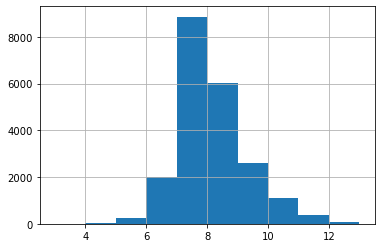

In [116]:
grade['grade'].hist()

The distribution looks pretty normal.  We could try cutting into 3 group to see if it improves our model.

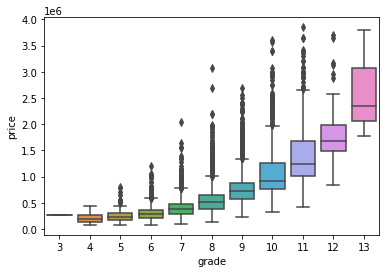

In [117]:
sns.boxplot(x=grade['grade'], y=grade['price'])

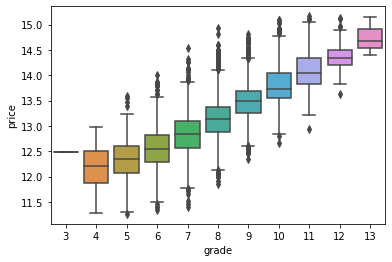

In [118]:
sns.boxplot(x=grade['grade'], y=np.log(grade['price']))

In [119]:
grade_cats = pd.qcut(grade['grade'], 3, labels=[1, 2, 3]).astype('int')
grade_cats.head()

id
7129300520    1
6414100192    1
5631500400    1
2487200875    1
1954400510    2
Name: grade, dtype: int64

In [120]:
df = grade.copy()
df['grade_cat'] = grade_cats
df = df.drop(columns='grade')
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,grade_cat
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,1
6414100192,2.0,1.0,3,3,2,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,1


In [121]:
X = df.drop(columns='price')
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.6864654133643449,
 'train_rmse': 186709.31811915926,
 'test_rmse': 187877.27778918523,
 'diff_rmse': 1167.9596700259717}

In [122]:
grade_cats = pd.get_dummies(grade_cats, drop_first=True, prefix='grade')
grade_cats.head(2)

,grade_2,grade_3
id,,
7129300520,0,0
6414100192,0,0


In [123]:
df = grade.copy()
df = df.combine_first(grade_cats)
df = df.drop(columns=['grade'])
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade_2,grade_3,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,0.0,0.0,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,0.0,0.0,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


In [124]:
X = df.drop(columns=['price'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.6915893385014529,
 'train_rmse': 185172.82787336284,
 'test_rmse': 186335.66896713726,
 'diff_rmse': 1162.8410937744193}

In [125]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


In [126]:
# Since grade is not one of my variables of interest I can have as many categories as we want.

df = grade.copy()
dummies = pd.get_dummies(df['grade'], drop_first=True, prefix='grade')
dummies.head(2)


,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,,,,,,,,,,
7129300520,0,0,0,1,0,0,0,0,0,0
6414100192,0,0,0,1,0,0,0,0,0,0


In [127]:
df2 = df.combine_first(dummies)
df2 = df2.drop('grade', axis=1)
df2.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade_10,grade_11,grade_12,grade_13,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


In [128]:
X = df2.drop('price', axis=1)
y=df2['price']

quicktest(X, y)

{'r2_adjusted': 0.7218396483510425,
 'train_rmse': 175787.39963235258,
 'test_rmse': 177546.9084365642,
 'diff_rmse': 1759.5088042116258}

Grade performs best as is.  No changes.

## lat

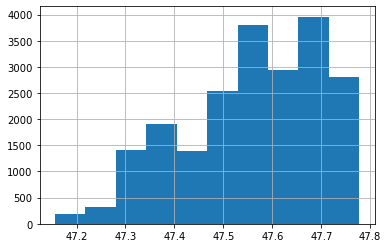

In [129]:
lat = grade.copy()
lat['lat'].hist()

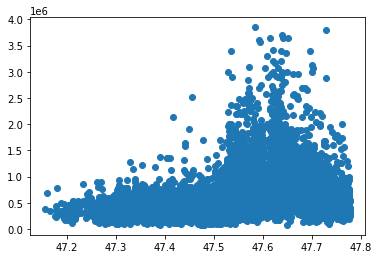

In [130]:
plt.scatter(lat['lat'], lat['price'])

There is obviously a latitude that has higher prices.  Lets see if we can find an inflection point.

In [131]:
df = lat.copy()
df['lat_rounded'] = round(df['lat'], 2)
df[['lat', 'lat_rounded']].head()

,lat,lat_rounded
id,,
7129300520,47.5112,47.51
6414100192,47.7210,47.72
5631500400,47.7379,47.74
2487200875,47.5208,47.52
1954400510,47.6168,47.62


In [132]:
lat_means = df.groupby('lat_rounded')['price'].mean()
lat_means

lat_rounded
47.16    467333.333333
47.18    375250.000000
47.19    290630.785714
47.20    265459.072727
47.21    265765.323077
             ...      
47.74    463226.888664
47.75    458089.803030
47.76    486031.602067
47.77    485090.867470
47.78    444039.444444
Name: price, Length: 62, dtype: float64

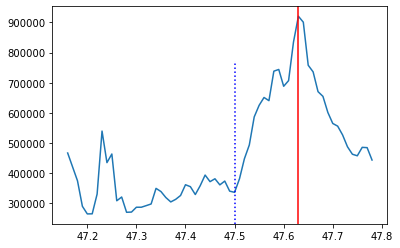

In [133]:
plt.plot(lat_means)
plt.axvline(lat_means.sort_values().iloc[-1:].index, c='red')
plt.axvline(47.5, c='b', ymax=.75, linestyle=':')

In [134]:
high = lat_means.sort_values().iloc[-1:].index

Looks like between 47.5 and 47.8 there is some signifcance to the data.  Below that it looks like noise.

In [135]:
# remove values for everything below 47.5

df['lat_cropped'] = df['lat'].map(lambda x:x if x >= 47.5 else np.nan)
df['lat_cropped'] = df['lat_cropped'] - high
df['lat_cropped'].head()

id
7129300520   -0.1188
6414100192    0.0910
5631500400    0.1079
2487200875   -0.1092
1954400510   -0.0132
Name: lat_cropped, dtype: float64

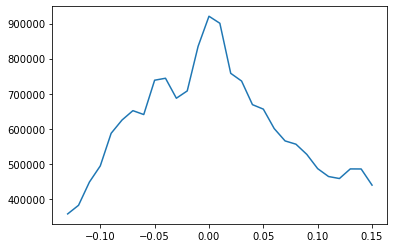

In [136]:
df['lat_rounded'] = round(df['lat_cropped'], 2) 
#df['lat_rounded'] = df['lat_rounded'].map(lambda x:x if x >= 47.5 else np.nan)
lat_means = df.groupby('lat_rounded')['price'].mean()
plt.plot(lat_means)


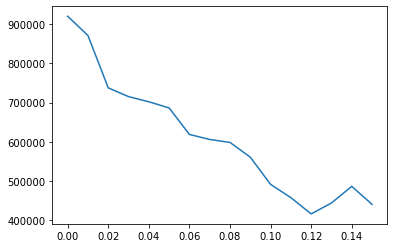

In [137]:
# take absolute value
df['lat_rounded'] = round(np.abs(df['lat_cropped']), 2) 
#df['lat_rounded'] = df['lat_rounded'].map(lambda x:x if x >= 47.5 else np.nan)
lat_means = df.groupby('lat_rounded')['price'].mean()
plt.plot(lat_means)


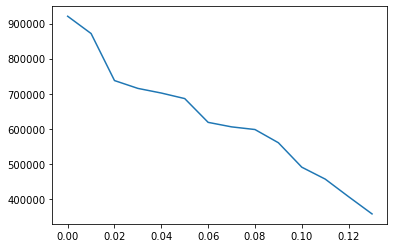

In [138]:
# remove above 0.12

df['lat_cropped_abs'] = df['lat_cropped'].map(lambda x: x if x < 0.12 else np.nan)
df['lat_cropped_abs'] = np.abs(df['lat_cropped_abs'])

df['lat_rounded'] = round(df['lat_cropped_abs'], 2) 
lat_means = df.groupby('lat_rounded')['price'].mean()
plt.plot(lat_means)

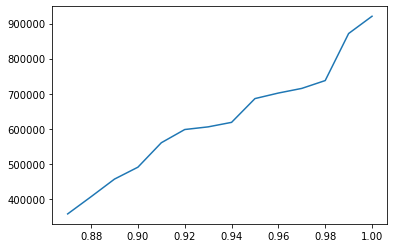

In [139]:
# flip it so it increases from 0
df['lat_cropped_abs'] = np.abs(1-df['lat_cropped_abs'])

df['lat_rounded'] = round(df['lat_cropped_abs'], 2) 
lat_means = df.groupby('lat_rounded')['price'].mean()
plt.plot(lat_means)

In [140]:
df['lat_cropped_abs'].min()

0.8699999999999974

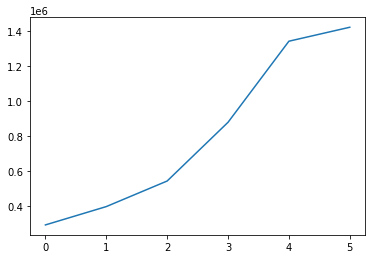

In [141]:
df['lat_cropped_abs'] = df.fillna(0)
df['lat_rounded'] = round(df['lat_cropped_abs'], 2) 
lat_means = df.groupby('lat_rounded')['price'].mean()
plt.plot(lat_means)

In [142]:
# That looks prety linear.  Test the model with this instead of lat
df.head()

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,lat_rounded,lat_cropped,lat_cropped_abs
id,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,1.0,-0.1188,1.0
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,2.0,0.0910,2.0
5631500400,1.0,0.0,2,3,1,6,47.7379,-122.233,180000.0,770,0,770,2720,8062,9.210340,0.0,0.0,0.0,0.0,0.0,1933,0.0,98028,1.0,0.1079,1.0
2487200875,3.0,0.0,4,5,1,7,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,8.517193,0.0,0.0,0.0,0.0,0.0,1965,0.0,98136,3.0,-0.1092,3.0
1954400510,2.0,0.0,3,3,1,8,47.6168,-122.045,510000.0,1680,0,1680,1800,7503,8.997147,0.0,0.0,0.0,0.0,0.0,1987,0.0,98074,2.0,-0.0132,2.0


In [143]:
X = df.drop(columns=['price', 'lat','lat_rounded', 'lat_cropped'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.6565057764697377,
 'train_rmse': 195426.63944346327,
 'test_rmse': 196836.44638958178,
 'diff_rmse': 1409.8069461185078}

In [144]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


Thats more linear, but provides poorer results.  We will not use this transformation Lets move on.

## sqft_above - no change

In [145]:
sa = grade.copy()

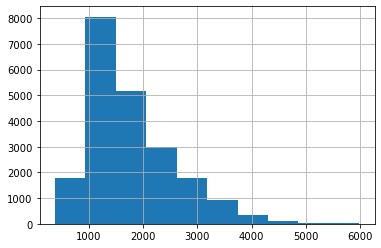

In [146]:
sa['sqft_above'].hist()

In [147]:
sa[['sqft_above', 'sqft_living']].corr()

,sqft_above,sqft_living
sqft_above,1.000000,0.867965
sqft_living,0.867965,1.000000


In [148]:
df = sa.copy()
df['sqft_above_log'] = np.log(sa['sqft_above'])

X = df.drop(columns = ['price', 'sqft_above'])
y = df['price']

X.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_above_log
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,7.073270
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,7.682482


In [149]:
quicktest(X, y)

{'r2_adjusted': 0.7091094332699324,
 'train_rmse': 179843.78990549914,
 'test_rmse': 181096.78143789666,
 'diff_rmse': 1252.9915323975147}

The results are better not log transformed.  There is nothing else to do here right now.

In [150]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


## sqft_basement

In [151]:
wf = sa.copy()
sb.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


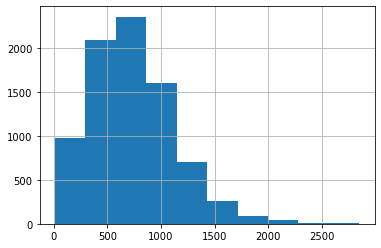

In [152]:
sb[sb['sqft_basement'] > 0]['sqft_basement'].hist()

(array([1.000e+00, 1.000e+00, 1.500e+01, 5.800e+01, 2.700e+02, 6.340e+02,
        1.742e+03, 3.161e+03, 2.077e+03, 2.000e+02]),
 array([2.30258509, 2.86783401, 3.43308293, 3.99833185, 4.56358077,
        5.12882968, 5.6940786 , 6.25932752, 6.82457644, 7.38982536,
        7.95507427]),
 <a list of 10 Patch objects>)

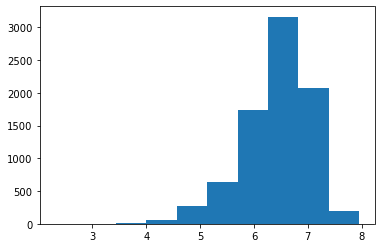

In [153]:
basement = sb[sb['sqft_basement'] > 0]['sqft_basement']
basement_log = np.log(basement)
plt.hist(basement_log)

In [154]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21258 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   baths_full     21258 non-null  float64
 1   baths_partial  21258 non-null  float64
 2   bedrooms       21258 non-null  int64  
 3   condition      21258 non-null  int64  
 4   floor_count    21258 non-null  int64  
 5   grade          21258 non-null  int64  
 6   lat            21258 non-null  float64
 7   long           21258 non-null  float64
 8   price          21258 non-null  float64
 9   sqft_above     21258 non-null  int64  
 10  sqft_basement  21258 non-null  int64  
 11  sqft_living    21258 non-null  int64  
 12  sqft_living15  21258 non-null  int64  
 13  sqft_lot15     21258 non-null  int64  
 14  sqft_lot_log   21258 non-null  float64
 15  view_1         21258 non-null  float64
 16  view_2         21258 non-null  float64
 17  view_3         21258 non-null  float

## sqft_living15

In [155]:
sl15 = sb.copy()

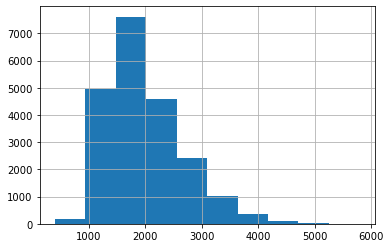

In [156]:
sl15['sqft_living15'].hist()

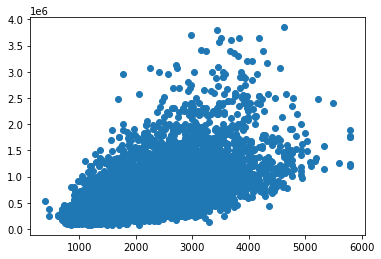

In [157]:

plt.scatter(sl15['sqft_living15'], sl15['price'])

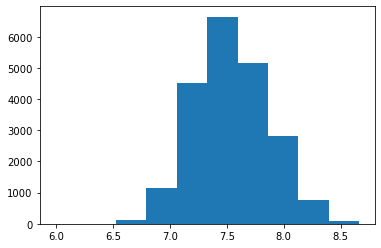

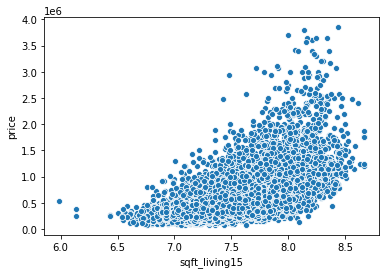

In [158]:
plt.hist(np.log(sl15['sqft_living15']))
plt.show()
sns.scatterplot(np.log(sl15['sqft_living15']), sl15['price'])

In [159]:
df = sl15.copy()
df['sqft_living15_log'] = np.log(df['sqft_living15'])
df = df.drop(columns=['sqft_living15'])
df.head()

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_living15_log
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,7.200425
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,7.432484
5631500400,1.0,0.0,2,3,1,6,47.7379,-122.233,180000.0,770,0,770,8062,9.210340,0.0,0.0,0.0,0.0,0.0,1933,0.0,98028,7.908387
2487200875,3.0,0.0,4,5,1,7,47.5208,-122.393,604000.0,1050,910,1960,5000,8.517193,0.0,0.0,0.0,0.0,0.0,1965,0.0,98136,7.215240
1954400510,2.0,0.0,3,3,1,8,47.6168,-122.045,510000.0,1680,0,1680,7503,8.997147,0.0,0.0,0.0,0.0,0.0,1987,0.0,98074,7.495542


In [160]:
X = df.drop('price', axis=1)
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7037904471738913,
 'train_rmse': 181491.98343853964,
 'test_rmse': 182668.4473627365,
 'diff_rmse': 1176.463924196869}

In [161]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


No significant difference. Do not log transform sqft_living15

## sqft_lot15

In [162]:
lot15 = sl15.copy()
lot15.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


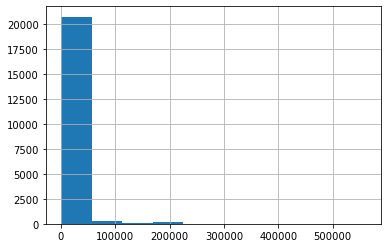

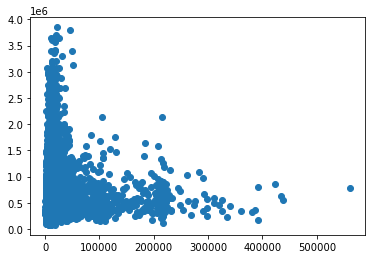

In [163]:
lot15['sqft_lot15'].hist()
plt.show()
plt.scatter(lot15['sqft_lot15'], lot15['price'])

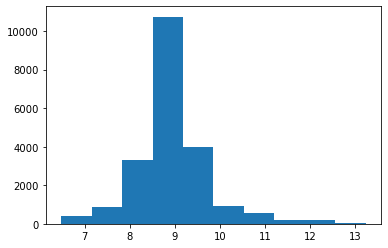

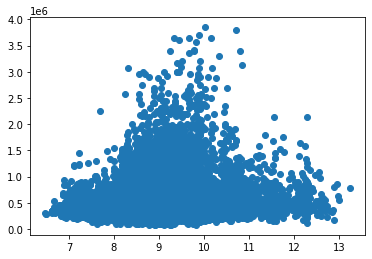

In [164]:
# log transform
plt.hist(np.log(lot15['sqft_lot15']))
plt.show()
plt.scatter(np.log(lot15['sqft_lot15']), lot15['price'])

This looks very similar to sqft_lot.  For now lets just check for improvement and we can consider how to handle the correlation later.  Perhaps the difference in size from the lot to the neighbors logs.


In [165]:
data_preprocessed[['sqft_lot']]

,sqft_lot
id,
7129300520,5650
6414100192,7242
5631500400,10000
2487200875,5000
1954400510,8080
...,...
263000018,1131
6600060120,5813
1523300141,1350


In [166]:
df = lot15.copy()

# get sqft_lot back
df['id'] = df.index
df = df.merge(data_preprocessed['sqft_lot'].copy(), 
              how='left', left_index=True, right_index=True)
df = df.set_index('id')
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_lot
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,5650
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,7242


In [167]:
df[sorted(df.columns)].head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125


In [168]:
df['sqft_lot15_log'] = np.log(df['sqft_lot15'])
   
df[['sqft_lot', 'sqft_lot15', 'sqft_lot_log', 'sqft_lot15_log']].corr()

,sqft_lot,sqft_lot15,sqft_lot_log,sqft_lot15_log
sqft_lot,1.000000,0.782294,0.706729,0.632029
sqft_lot15,0.782294,1.000000,0.636546,0.719338
sqft_lot_log,0.706729,0.636546,1.000000,0.920173
sqft_lot15_log,0.632029,0.719338,0.920173,1.000000


The lot and lot15 on log scale are have higher correlation than not.  Try to take the difference to create a variable for difference from the closest 15 neighbors.

In [169]:
df['sqft_lot_diff_lot15'] = df['sqft_lot'] - df['sqft_lot15']
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_lot,sqft_lot15_log,sqft_lot_diff_lot15
id,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,5650,8.639411,0
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7639,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,7242,8.941022,-397


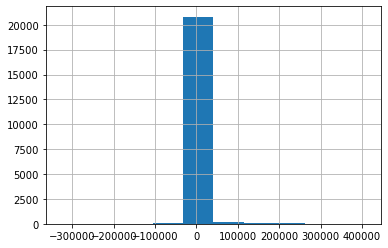

In [170]:
df['sqft_lot_diff_lot15'].hist()

In [171]:
# Test it
df[['sqft_lot', 'sqft_lot_log', 'sqft_lot15', 'sqft_lot_diff_lot15']].corr()


,sqft_lot,sqft_lot_log,sqft_lot15,sqft_lot_diff_lot15
sqft_lot,1.000000,0.706729,0.782294,0.610526
sqft_lot_log,0.706729,1.000000,0.636546,0.325085
sqft_lot15,0.782294,0.636546,1.000000,-0.015731
sqft_lot_diff_lot15,0.610526,0.325085,-0.015731,1.000000


In [172]:
# Test it

y = df['price']
X = df.drop(columns=['price', 'sqft_lot', 'sqft_lot15', 'sqft_lot15_log'])
X[sorted(X.columns)].head(2)

quicktest(X, y)

{'r2_adjusted': 0.7059655339055133,
 'train_rmse': 180803.65070536066,
 'test_rmse': 182104.33039494284,
 'diff_rmse': 1300.6796895821753}

In [173]:
model_report()


,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795


In [174]:
# This did make a very small but overall positive difference.  Keep the change.
lot15 = df.drop(columns=['sqft_lot', 'sqft_lot15', 'sqft_lot15_log'])

X = df.drop('price', axis=1)
y = df['price']

quicktest(X, y, name='7 (Difference of lot and lot15)')

{'r2_adjusted': 0.7070275973702058,
 'train_rmse': 180473.18678187043,
 'test_rmse': 181741.38470662705,
 'diff_rmse': 1268.1979247566196}

In [175]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795
7 (Difference of lot and lot15),0.707028,180473.186782,181741.384707,1268.197925


In [176]:
lot15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21258 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   baths_full           21258 non-null  float64
 1   baths_partial        21258 non-null  float64
 2   bedrooms             21258 non-null  int64  
 3   condition            21258 non-null  int64  
 4   floor_count          21258 non-null  int64  
 5   grade                21258 non-null  int64  
 6   lat                  21258 non-null  float64
 7   long                 21258 non-null  float64
 8   price                21258 non-null  float64
 9   sqft_above           21258 non-null  int64  
 10  sqft_basement        21258 non-null  int64  
 11  sqft_living          21258 non-null  int64  
 12  sqft_living15        21258 non-null  int64  
 13  sqft_lot_log         21258 non-null  float64
 14  view_1               21258 non-null  float64
 15  view_2               2

## yr_built

In [177]:
yr_built = lot15.copy()

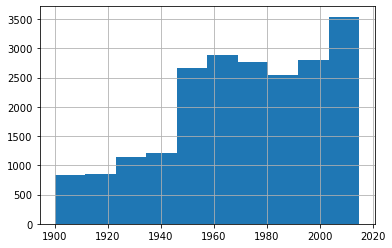

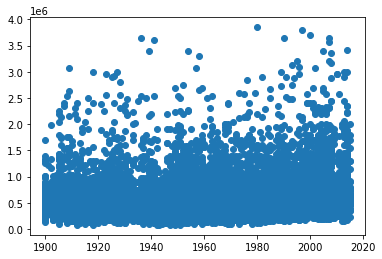

In [178]:
yr_built['yr_built'].hist()
plt.show()
plt.scatter(yr_built['yr_built'], yr_built['price'])

In [179]:
yr_built[yr_built['yr_built'] == 0]

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_lot_diff_lot15
id,,,,,,,,,,,,,,,,,,,,,,,


In [180]:
# transform so it is years since the first building in the set.

#yr_built_delta = 
yr_built_first = yr_built[yr_built['yr_built'] > 0].yr_built.min()

yr_built['yr_built_delta'] = yr_built['yr_built'] - yr_built_first
yr_built.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_lot_diff_lot15,yr_built_delta
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,0,55
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,-397,51


In [181]:
# test it

X = yr_built.drop(columns = ['price', 'yr_built'])
y = yr_built['price']

quicktest(X, y)

{'r2_adjusted': 0.7059655339055131,
 'train_rmse': 180803.65070536075,
 'test_rmse': 182104.33039494194,
 'diff_rmse': 1300.6796895811858}

In [182]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795
7 (Difference of lot and lot15),0.707028,180473.186782,181741.384707,1268.197925


In [183]:
# That is worse.  What if we try how long ago it was built?

yr_built['yr_built_age'] = yr_built['yr_built'] - 2015

X = yr_built.drop(columns = ['price', 'yr_built', 'yr_built_delta'])
y = yr_built['price']

quicktest(X, y)

{'r2_adjusted': 0.7059655339055133,
 'train_rmse': 180803.65070536075,
 'test_rmse': 182104.33039494194,
 'diff_rmse': 1300.6796895811858}

In [184]:
# this is essentially no difference, reset yr_built
yr_built = lot15.copy()

## yr_renovated

In [185]:
yr_ren = yr_built.copy()


In [186]:
df = yr_ren.copy()
df['yr_ren_age'] = df['yr_renovated'] - 2015

X = df.drop(columns = ['price', 'yr_renovated'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7059655339055135,
 'train_rmse': 180803.65070536075,
 'test_rmse': 182104.33039494106,
 'diff_rmse': 1300.6796895803127}

## zipcode

In [187]:
zips = yr_ren.copy()
zips.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode,sqft_lot_diff_lot15
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178,0
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125,-397


### all zips as categories

In [188]:
df = zips.copy()

In [189]:
dummies = pd.get_dummies(df['zipcode'], drop_first=True, prefix='zip')
df = df.combine_first(dummies)
df = df.drop('zipcode', axis=1)

X = df.drop(columns=['price'])
y = df['price']

quicktest(X, y, '8 (zipcodes as cats)')

{'r2_adjusted': 0.8188424179532002,
 'train_rmse': 141630.91376027046,
 'test_rmse': 143196.13990379678,
 'diff_rmse': 1565.2261435263208}

In [190]:
df_zips_as_cats = df.copy()

In [191]:
X.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,3,1,7,47.5112,-122.257,1180,0,1180,1340,0,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6414100192,2.0,1.0,3,3,2,7,47.7210,-122.319,2170,400,2570,1690,-397,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### By county

In [192]:
# data set from https://simplemaps.com/data/us-cities
zipcodes = pd.read_csv('data/simplemaps_uszips_basicv1.73/uszips.csv')
zipcodes.head()


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico


In [193]:
zipcodes = zipcodes.set_index('zip').city
zipcodes

zip
601         Adjuntas
602           Aguada
603        Aguadilla
606          Maricao
610           Anasco
            ...     
99923          Hyder
99925        Klawock
99926     Metlakatla
99927    Point Baker
99929       Wrangell
Name: city, Length: 33097, dtype: object

In [194]:
df = zips.copy()
df['city'] = df['zipcode'].map(zipcodes)
df['city'].isna().sum()

0

In [195]:
dummies = pd.get_dummies(df['city'], drop_first=True, prefix='city_')
df = df.combine_first(dummies).drop('city', axis=1)
df.head()

,baths_full,baths_partial,bedrooms,city__Bellevue,city__Black Diamond,city__Bothell,city__Carnation,city__Duvall,city__Enumclaw,city__Fall City,city__Federal Way,city__Issaquah,city__Kenmore,city__Kent,city__Kirkland,city__Maple Valley,city__Medina,city__Mercer Island,city__North Bend,city__Redmond,city__Renton,city__Sammamish,city__Seattle,city__Snoqualmie,city__Vashon,city__Woodinville,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1,7,47.5112,-122.257,221900.0,1180,0,1180,1340,0,8.639411,0.0,0.0,0.0,0.0,0.0,1955,0.0,98178
6414100192,2.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2,7,47.7210,-122.319,538000.0,2170,400,2570,1690,-397,8.887653,0.0,0.0,0.0,0.0,0.0,1951,1991.0,98125
5631500400,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,6,47.7379,-122.233,180000.0,770,0,770,2720,1938,9.210340,0.0,0.0,0.0,0.0,0.0,1933,0.0,98028
2487200875,3.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5,1,7,47.5208,-122.393,604000.0,1050,910,1960,1360,0,8.517193,0.0,0.0,0.0,0.0,0.0,1965,0.0,98136
1954400510,2.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1,8,47.6168,-122.045,510000.0,1680,0,1680,1800,577,8.997147,0.0,0.0,0.0,0.0,0.0,1987,0.0,98074


In [196]:
X = df.drop(columns=['price', 'zipcode'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7533887608659919,
 'train_rmse': 165472.9275286252,
 'test_rmse': 166955.85894091128,
 'diff_rmse': 1482.931412286067}

### binning by median sale price

testing zipcodes with 2 bins
testing zipcodes with 3 bins
testing zipcodes with 4 bins
testing zipcodes with 5 bins
testing zipcodes with 6 bins
testing zipcodes with 7 bins
testing zipcodes with 8 bins
testing zipcodes with 9 bins
testing zipcodes with 10 bins


,binsizes,r2_adjs,train_rmse,test_rmse
0,2.0,0.734018,171966.864817,173146.047872
1,3.0,0.746287,167936.681560,169168.904700
2,4.0,0.751896,166057.924287,167295.068318
3,5.0,0.765164,161547.541369,162668.946464
4,6.0,0.778456,156900.698438,157956.579180
5,7.0,0.783528,155065.423675,156192.237519
6,8.0,0.785723,154261.867713,155398.634248
7,9.0,0.786446,153975.384549,155156.431069
8,10.0,0.798735,149465.125489,150592.412690


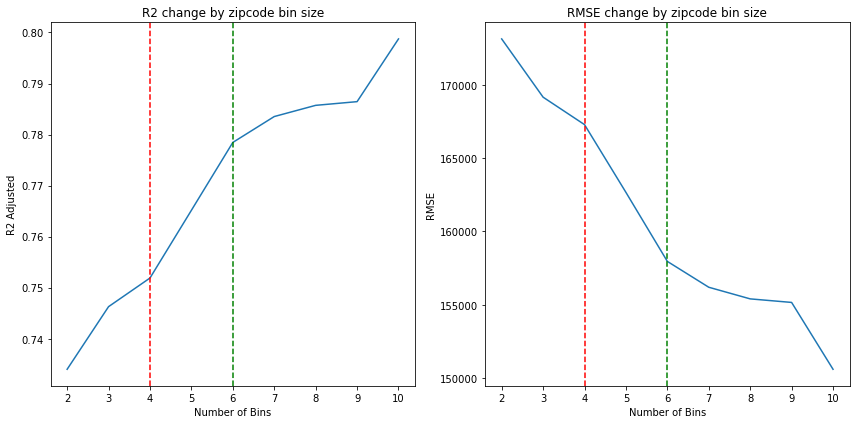

In [197]:
train_rmses = []
test_rmses = []
r2_adjs = []
binsizes = []

df_m3 = zips.copy()
for bins in range(2, 11):
    #bins *= 3
    print(f"testing zipcodes with {bins} bins")
    zip_means = df_m3[['price', 'zipcode']].groupby('zipcode').mean()
    zip_cats = pd.qcut(zip_means['price'], bins) # labels=[1,2,3,4])
    df_m3['zipcode_cat'] = df_m3['zipcode'].map(zip_cats)

    # create dummy variables
    dummies = pd.get_dummies(df_m3['zipcode_cat'], prefix='zipcat', 
                             drop_first=True)

    df_m3 = df_m3.combine_first(dummies)
    df_m3.drop('zipcode_cat', axis=1, inplace=True)

    X = df_m3.drop(columns=['zipcode', 'price'])
    y = df_m3['price']
    
    summary = quicktest(X, y)
    #display(summary)
    train_rmses.append(summary['train_rmse'])
    test_rmses.append(summary['test_rmse'])
    r2_adjs.append(summary['r2_adjusted'])
    binsizes.append(bins)
    
report = pd.DataFrame([binsizes, r2_adjs, train_rmses, test_rmses]).T
report.columns = ['binsizes', 'r2_adjs', 'train_rmse', 'test_rmse']
display(pd.DataFrame(report))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax1)
plt.plot(binsizes, r2_adjs, label='R2_adj')
plt.title('R2 change by zipcode bin size')
plt.ylabel('R2 Adjusted')
plt.xlabel('Number of Bins')
plt.axvline(x=4, c='r', ls='--' )
plt.axvline(x=6, c='g', ls='--' )

plt.sca(ax2)
plt.plot(binsizes, test_rmses, label='rmse')
plt.title('RMSE change by zipcode bin size')
plt.ylabel('RMSE')
plt.xlabel('Number of Bins')
plt.axvline(x=4, c='r', ls='--' )
plt.axvline(x=6, c='g', ls='--' )

plt.tight_layout()

### bin zipcodes by median price/sqft_living

testing zipcodes with 1 bins
testing zipcodes with 2 bins
testing zipcodes with 3 bins
testing zipcodes with 4 bins
testing zipcodes with 5 bins
testing zipcodes with 6 bins
testing zipcodes with 7 bins
testing zipcodes with 8 bins
testing zipcodes with 9 bins
testing zipcodes with 10 bins
testing zipcodes with 11 bins
testing zipcodes with 12 bins
testing zipcodes with 13 bins
testing zipcodes with 14 bins
testing zipcodes with 15 bins


,binsizes,r2_adjs,train_rmse,test_rmse
0,1.0,0.701318,182232.202066,183538.832287
1,2.0,0.731499,172776.680173,173989.886509
2,3.0,0.761209,162952.626338,163865.171271
3,4.0,0.772258,159124.689334,160070.329262
4,5.0,0.776745,157548.734041,158484.272053
5,6.0,0.784890,154645.139836,155526.256380
6,7.0,0.787915,153549.904041,154426.731942
7,8.0,0.796886,150262.158334,151148.515759
8,9.0,0.802005,148351.103548,149232.390239
9,10.0,0.800736,148822.936320,149709.701017


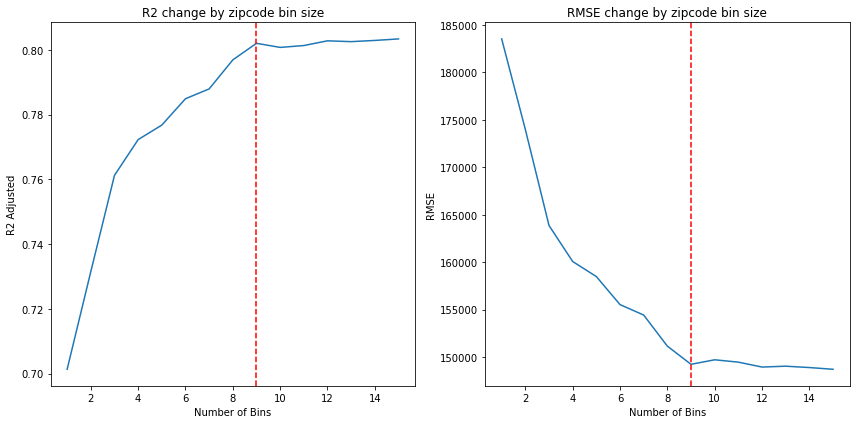

In [198]:
## would there be a diference if we used price instead of price_log??

#group zipcodes by mean saleprice
test_rmses = []
train_rmses =[]
r2_adjs = []
binsizes = []

ppsf = zips.copy()
ppsf['id'] = ppsf.index
#ppsf = ppsf.merge(data_preprocessed['sqft_living'],
#                left_index=True, right_index=True,
#                how='left').set_index('id')


ppsf['price_sqft'] = ppsf['price'] / ppsf['sqft_living']

zip_means = ppsf.groupby('zipcode').median()

    
for bins in range(1,16):
    df = zips.copy()
    
    #bins *= 3
    
    print(f"testing zipcodes with {bins} bins")

    zip_cats = pd.qcut(zip_means['price_sqft'].sort_values(), bins, labels=list(range(bins)))

    zipcode_cat = df['zipcode'].map(zip_cats)
    
    #display(df['zipcode_cat'].unique())
    dummies = pd.get_dummies(zipcode_cat, prefix='zipcat', 
                             drop_first=True)

    df = df.combine_first(dummies)

    #display(df.head())
    
    X=df.drop(columns=['price', 'zipcode'])
    y =df['price']
    
    summary = quicktest(X, y)
    #display(summary)
    train_rmses.append(summary['train_rmse'])
    test_rmses.append(summary['test_rmse'])
    r2_adjs.append(summary['r2_adjusted'])
    binsizes.append(bins)
    
report = pd.DataFrame([binsizes, r2_adjs, train_rmses, test_rmses]).T
report.columns = ['binsizes', 'r2_adjs', 'train_rmse', 'test_rmse']
display(pd.DataFrame(report))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax1)
plt.plot(binsizes, r2_adjs, label='R2_adj')
plt.title('R2 change by zipcode bin size')
plt.ylabel('R2 Adjusted')
plt.xlabel('Number of Bins')
plt.axvline(x=9, c='r', ls='--' )
#plt.axvline(x=6, c='g', ls='--' )

plt.sca(ax2)
plt.plot(binsizes, test_rmses, label='rmse')
plt.title('RMSE change by zipcode bin size')
plt.ylabel('RMSE')
plt.xlabel('Number of Bins')
plt.axvline(x=9, c='r', ls='--' )
#plt.axvline(x=6, c='g', ls='--' )

plt.tight_layout()

In [199]:
zipcode_cat

id
7129300520     3
6414100192     9
5631500400     6
2487200875    11
1954400510     8
              ..
263000018     13
6600060120     4
1523300141    11
291310100      8
1523300157    11
Name: zipcode, Length: 21258, dtype: category
Categories (15, int64): [0 < 1 < 2 < 3 ... 11 < 12 < 13 < 14]

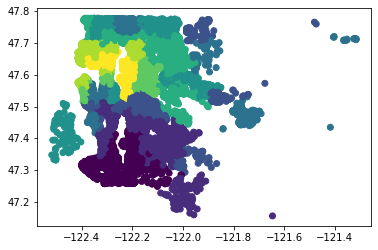

In [200]:
# visualize the zones

zones = 9
zip_cats = pd.qcut(zip_means['price_sqft'].sort_values(), zones, labels=(range(zones)))
zipcode_cat = df['zipcode'].map(zip_cats)
plt.scatter(df['long'], df['lat'], c=zipcode_cat)


Even though more zipcode zones performes better, we will use only 3 zipcode zones for the sake of explaining the value of the zones to the stakeholders.

In [201]:
# finalize the model

df = zips.copy()

zip_cats = pd.qcut(zip_means['price_sqft'].sort_values(), 9, labels=list(range(1,10)))

zipcode_cat = df['zipcode'].map(zip_cats)
display(zipcode_cat.unique())

#display(df['zipcode_cat'].unique())
dummies = pd.get_dummies(zipcode_cat.sort_values(), prefix='zipcat', 
                         drop_first=True)

df = zips.combine_first(dummies)
df = df.drop('zipcode', axis=1)

display(df.head())

X=df.drop(columns=['price'])
y =df['price']

quicktest(X, y, '8 (zipcode bins)')

df_zips_as_cats = df.copy()

[3, 6, 4, 7, 1, 2, 8, 5, 9]
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_4,zipcat_5,zipcat_6,zipcat_7,zipcat_8,zipcat_9
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,7,47.3262,-122.214,300000.0,2400,0,2400,2060,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200019,1.0,1.0,4,4,1,8,47.4444,-122.351,647500.0,1160,900,2060,2590,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1200021,1.0,0.0,3,3,1,7,47.4434,-122.347,400000.0,1460,0,1460,2250,22977,10.668955,0.0,0.0,0.0,0.0,0.0,1952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2800031,1.0,0.0,3,4,2,6,47.4783,-122.265,235000.0,1010,420,1430,1290,-2721,8.935772,0.0,0.0,0.0,0.0,0.0,1930,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3600057,2.0,0.0,4,3,1,7,47.5803,-122.294,402500.0,760,890,1650,1480,0,8.161660,0.0,0.0,0.0,0.0,0.0,1951,2013.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [202]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795
7 (Difference of lot and lot15),0.707028,180473.186782,181741.384707,1268.197925
8 (zipcodes as cats),0.818842,141630.913760,143196.139904,1565.226144
8 (zipcode bins),0.802005,148307.477206,149770.364430,1462.887224


## Check correlations and multicolinearity

In [203]:
post_processing = df_zips_as_cats.copy()

In [204]:
post_processing.columns[~post_processing.columns.str.startswith('zip_')]

Index(['baths_full', 'baths_partial', 'bedrooms', 'condition', 'floor_count',
       'grade', 'lat', 'long', 'price', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_living15', 'sqft_lot_diff_lot15', 'sqft_lot_log',
       'view_1', 'view_2', 'view_3', 'view_4', 'waterfront', 'yr_built',
       'yr_renovated', 'zipcat_2', 'zipcat_3', 'zipcat_4', 'zipcat_5',
       'zipcat_6', 'zipcat_7', 'zipcat_8', 'zipcat_9'],
      dtype='object')

In [317]:
def corr_heatmap(df,figsize=(6, 4),hide_prefix=False):
    '''Output a correlation heatmap from a Pandas DataFrame'''
    
    # hide selected prefix
    if hide_prefix:
        df = df[df.columns[~df.columns.str.startswith(hide_prefix)]]
    
    cols = set(df.columns)
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                linewidths=0.3, cbar_kws={"shrink": .7},
                vmin=-1, vmax=1, annot=True);

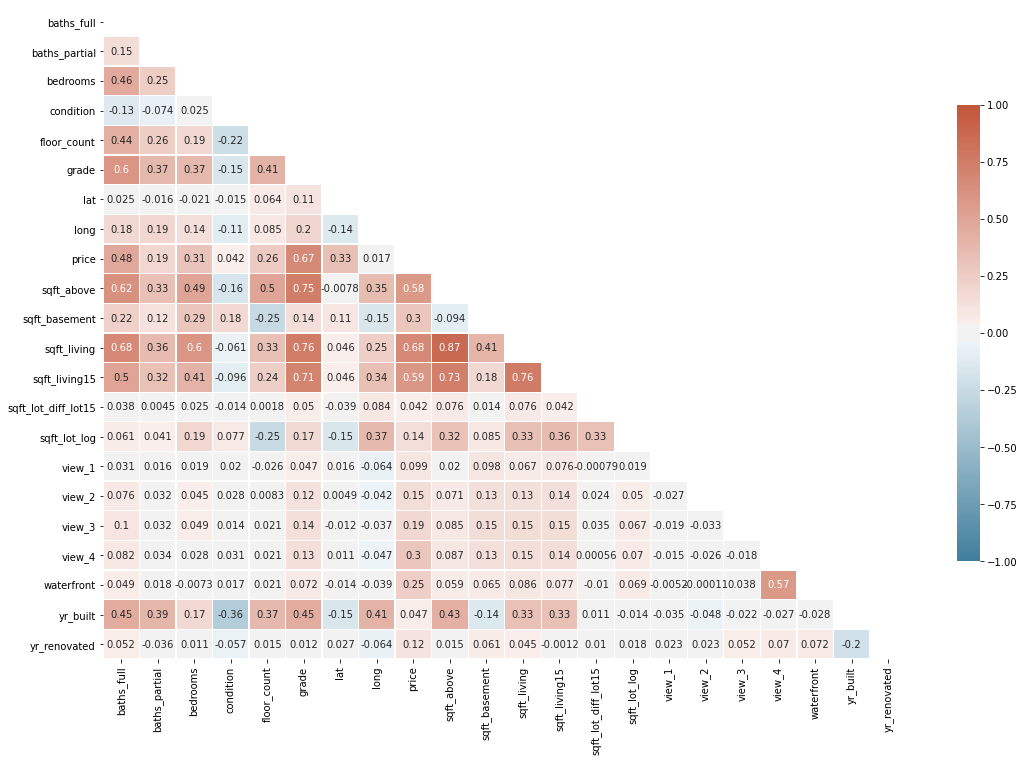

In [318]:
corr_heatmap(post_processing, figsize=(18,12), hide_prefix='zip')

### sqft_living vs sqft_above

The relationship between sqft_living and sqft_above is that sqft_above sometime has more space that isn't considered living space (sunporch, garage etc.). So lets subtract sqft_living from sqft_above to get the difference.  That should remain useful and also remove the correlation.

In [207]:
df = post_processing.copy()

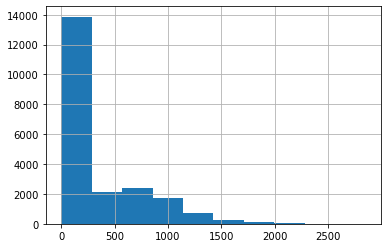

In [208]:
sqft_above_diff_living = df['sqft_living'] - df['sqft_above']
sqft_above_diff_living.name = 'sqft_above_diff_living'
sqft_above_diff_living.hist()


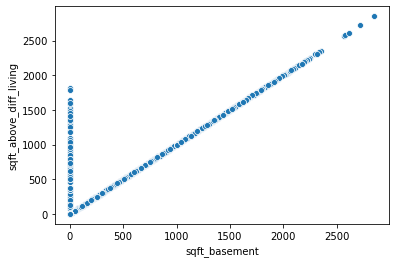

In [209]:

#that must be finished basements. Compare to basement sizes

sns.scatterplot(x=df['sqft_basement'],y=sqft_above_diff_living)



It looks like there are 2 kinds of sqft_living that are not part of sqft_above, basements, and other (porches etc), lets separate them.  We already have basements accounted for so lets create sqft_living_above

In [210]:
# get living space not included in above
df['sqft_living_above'] = sqft_above_diff_living - df['sqft_basement']


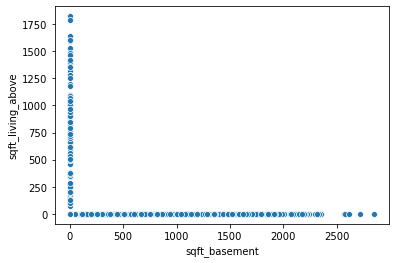

In [211]:
sns.scatterplot(x=df['sqft_basement'],y=df['sqft_living_above'])


In [212]:
# test it
df[['sqft_living', 'sqft_living_above']].corr()

,sqft_living,sqft_living_above
sqft_living,1.00000,0.04302
sqft_living_above,0.04302,1.00000


In [213]:
X = df.drop(columns=['price', 'sqft_above'])
y = df['price']
quicktest(X, y)

{'r2_adjusted': 0.802004623300842,
 'train_rmse': 148307.4772058369,
 'test_rmse': 149770.36442998837,
 'diff_rmse': 1462.8872241514619}

In [214]:
X = df.drop(columns=['price', 'sqft_living'])
y = df['price']
quicktest(X, y)

{'r2_adjusted': 0.8020046233008419,
 'train_rmse': 148307.47720583697,
 'test_rmse': 149770.3644299874,
 'diff_rmse': 1462.8872241504432}

In [215]:
df_section = df.drop(columns=['sqft_above'])

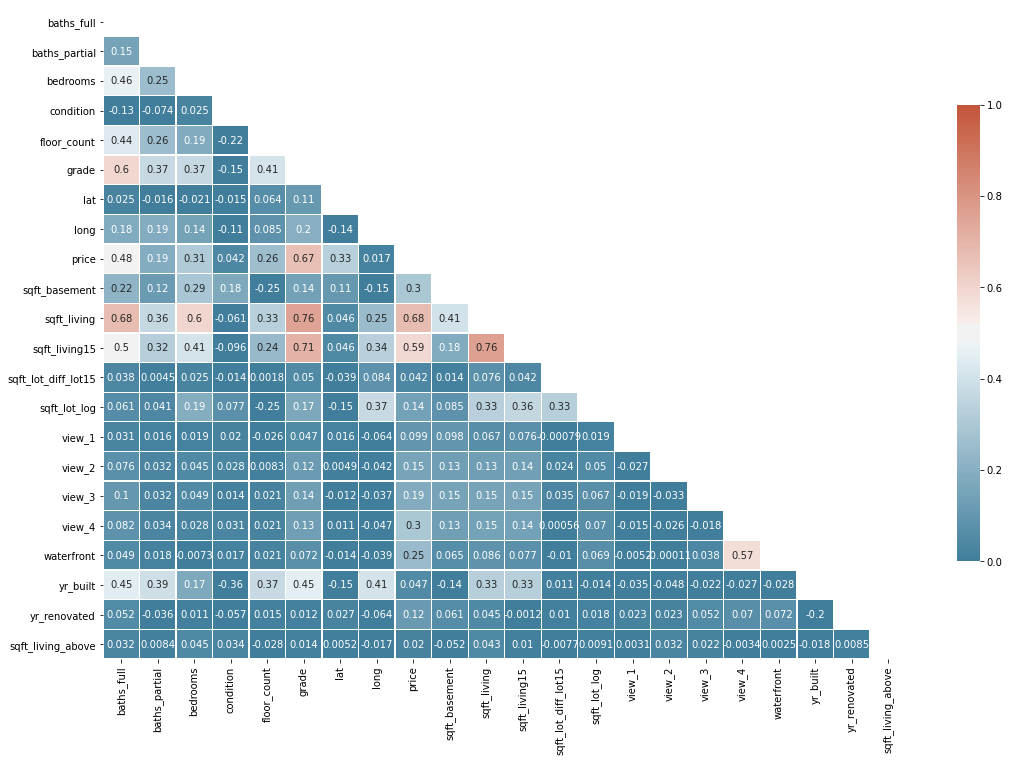

In [216]:
corr_heatmap(df_section, figsize=(18,12), hide_prefix='zip')

## sqft  sqft_living15
We'll take the same approach as with sqft_living ans sqft_above.  The difference from the size of the neighbors will tell us new information that shouldn't be correlated.

In [217]:
df = df_section.copy()
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,lat,long,price,sqft_basement,sqft_living,sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_4,zipcat_5,zipcat_6,zipcat_7,zipcat_8,zipcat_9,sqft_living_above
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,7,47.3262,-122.214,300000.0,0,2400,2060,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1200019,1.0,1.0,4,4,1,8,47.4444,-122.351,647500.0,900,2060,2590,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [218]:
df['sqft_living_diff_sqft_living15'] = df['sqft_living'] - df['sqft_living15']
df['sqft_living_diff_sqft_living15'].head()

id
1000102    340
1200019   -530
1200021   -790
2800031    140
3600057    170
Name: sqft_living_diff_sqft_living15, dtype: int64

In [219]:
X = df.drop(columns=['price', 'sqft_living15'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.8020046233008418,
 'train_rmse': 148307.4772058369,
 'test_rmse': 149770.3644299878,
 'diff_rmse': 1462.8872241508798}

Perfect, no change in $R^2$ but we removed the correlation

In [220]:
df_section = df.drop(columns=['sqft_living15'])

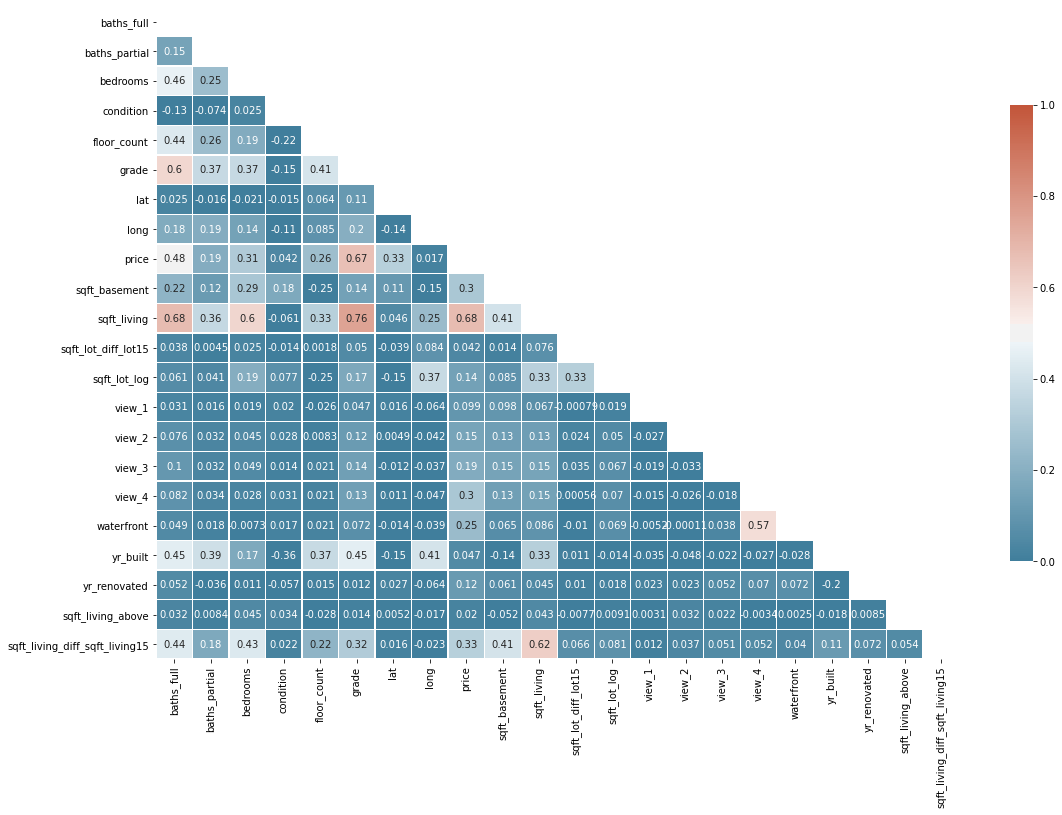

In [221]:
corr_heatmap(df_section, figsize=(18,12), hide_prefix='zip')

## grade - sqft_living

In [222]:
df = df_section.copy()


In [223]:
# lets try binning grade
grade['grade'].unique()


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

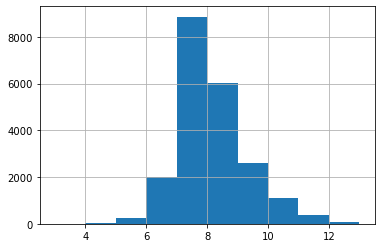

In [224]:
grade['grade'].hist()

Description of grade.  We can base our bins on this.

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [225]:
df['grade_bins'] = pd.cut(grade['grade'], [0, 3, 6, 7, 10, 13], 
                    labels=[1,2,3,4,5]).astype('int')
                    #labels=['1-3', '4-6', '7', '8-10', '11-13'])
df['grade_bins'].head()

id
1000102    3
1200019    4
1200021    3
2800031    2
3600057    3
Name: grade_bins, dtype: int64

In [226]:
df[['sqft_living', 'grade_bins']].corr()

,sqft_living,grade_bins
sqft_living,1.000000,0.646603
grade_bins,0.646603,1.000000


In [227]:
X = df.drop(columns=['price', 'grade'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7914517942817183,
 'train_rmse': 152206.12556984785,
 'test_rmse': 153697.08787911796,
 'diff_rmse': 1490.9623092701077}

The correlation is fixed, but the $R^2 is down a bit.  Lets try them as categories

In [228]:
df = df_section.copy()

df['grade_bins'] = pd.cut(grade['grade'], [0, 3, 6, 7, 10, 13], 
                    labels=['1-3', '4-6', '7', '8-10', '11-13'])
df['grade_bins'].head()

id
1000102       7
1200019    8-10
1200021       7
2800031     4-6
3600057       7
Name: grade_bins, dtype: category
Categories (5, object): [1-3 < 4-6 < 7 < 8-10 < 11-13]

In [229]:
dummies = pd.get_dummies(df['grade_bins'], drop_first=True, prefix='grade')
df = df.combine_first(dummies)
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,grade_11-13,grade_4-6,grade_7,grade_8-10,grade_bins,lat,long,price,sqft_basement,sqft_living,sqft_living_above,sqft_living_diff_sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_4,zipcat_5,zipcat_6,zipcat_7,zipcat_8,zipcat_9
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,7,0.0,0.0,1.0,0.0,7,47.3262,-122.214,300000.0,0,2400,0,340,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200019,1.0,1.0,4,4,1,8,0.0,0.0,0.0,1.0,8-10,47.4444,-122.351,647500.0,900,2060,0,-530,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [230]:
X = df.drop(columns=['price', 'grade', 'grade_bins'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.8046609814388541,
 'train_rmse': 147290.734729634,
 'test_rmse': 148855.95889150753,
 'diff_rmse': 1565.2241618735425}

In [231]:
# Try with only 3 bins
df = df_section.copy()


df['grade_bins'] = pd.cut(grade['grade'], [0, 6, 8 , 13], 
                    labels=['1-6', '7-8', '9-13'])
df['grade_bins'].head()

id
1000102    7-8
1200019    7-8
1200021    7-8
2800031    1-6
3600057    7-8
Name: grade_bins, dtype: category
Categories (3, object): [1-6 < 7-8 < 9-13]

In [232]:
dummies = pd.get_dummies(df['grade_bins'], drop_first=True, prefix='grade')
df = df.combine_first(dummies)
df.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade,grade_7-8,grade_9-13,grade_bins,lat,long,price,sqft_basement,sqft_living,sqft_living_above,sqft_living_diff_sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_4,zipcat_5,zipcat_6,zipcat_7,zipcat_8,zipcat_9
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,7,1.0,0.0,7-8,47.3262,-122.214,300000.0,0,2400,0,340,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200019,1.0,1.0,4,4,1,8,1.0,0.0,7-8,47.4444,-122.351,647500.0,900,2060,0,-530,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [233]:
X = df.drop(columns=['price', 'grade', 'grade_bins'])
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.797680852037,
 'train_rmse': 149910.52088391868,
 'test_rmse': 151441.3946455339,
 'diff_rmse': 1530.8737616152212}

3 bins is only nominally worse than 5 bins so we will use three to make explaining to the stake holder easier.

In [234]:
gsfl = df.drop(columns=['grade', 'grade_bins'])

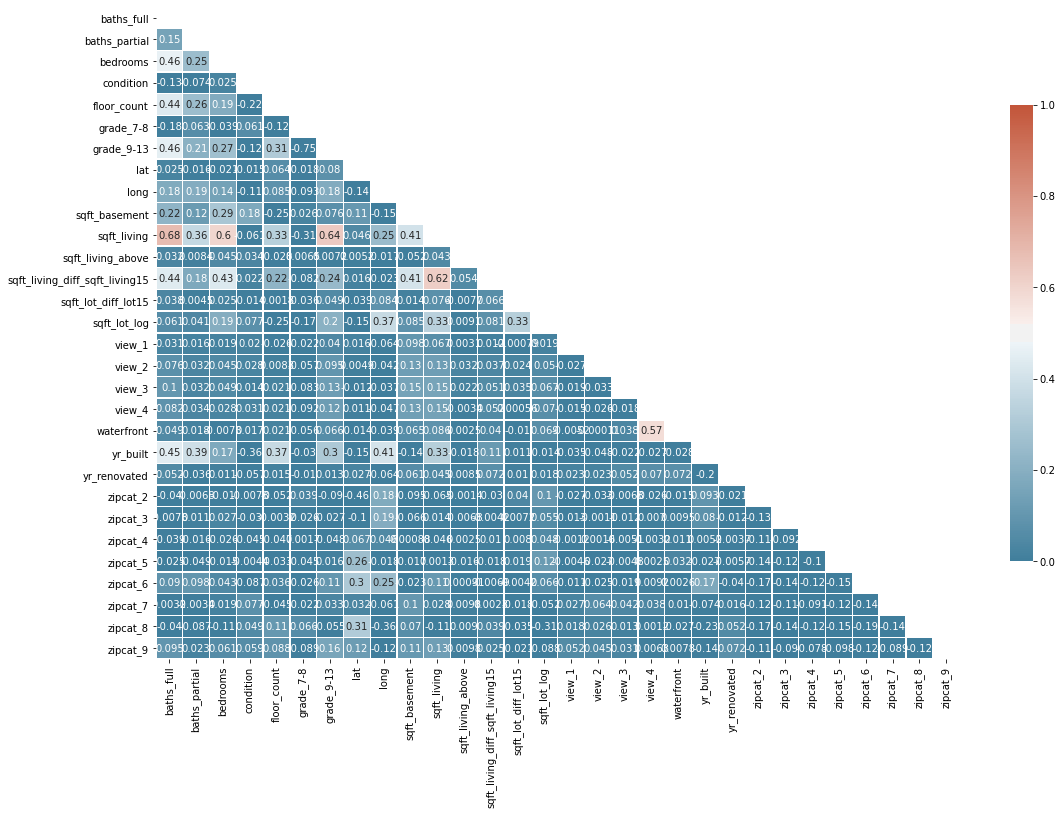

In [235]:
corr_heatmap(gsfl.drop('price', axis=1), figsize=(18,12))

## Multicolinearity

In [236]:
### Multicoliniarity
def multicolinearity_check(df):
    '''Takes a DataFrame and prints variance_inflation_vactor for all cols'''
    vifs = []
    for i, col in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        vifs.append(vif)
    vifs = pd.DataFrame(vifs, index=df.columns,columns=['vif'])
    vifs = vifs.sort_values(by='vif', ascending=False)
    display(HTML('<H3>MULTICOLINIERITY CHECK (vif)'))
#    print('MULTICOLINIERITY CHECK (vif)')
    display(vifs);

In [262]:
pd.options.display.max_rows = 999
multicolinearity_check(gsfl)

,vif
lat,389532.378698
long,377243.592397
yr_built,10663.517634
sqft_lot_log,206.029848
sqft_living,53.485127
condition,35.587698
bedrooms,27.537433
baths_full,18.528066
floor_count,17.819163
price,17.541365


### lat/long

In [302]:
# try centering lat and long
df = gsfl.copy()


df['lat_centered'] = df['lat']-df['lat'].mean()
df['long_centered'] = df['long']-df['long'].mean()

df = df.drop(columns=['lat', 'long'])

multicolinearity_check(df.drop(columns=['price']))


,vif
yr_built,272.000643
sqft_lot_log,199.183079
sqft_living,42.766711
condition,31.703704
bedrooms,26.908308
floor_count,17.730766
baths_full,16.594441
grade_7-8,9.883877
zipcat_6,6.266304
zipcat_8,6.198147


In [303]:
X = df.drop('price', axis=1)
y = df['price']

quicktest(X, y)

{'r2_adjusted': 0.7976808520369998,
 'train_rmse': 149910.52088391868,
 'test_rmse': 151441.3946455334,
 'diff_rmse': 1530.8737616147264}

In [304]:

LL = df.copy()

In [366]:
# Isolate condition
df = LL.copy()
df2 = df.drop(columns=[]) #'yr_built','sqft_lot_log','condition','bedrooms','floor_count','baths_full'])


X = df2.drop('price', axis=1)
y = df2['price']

display(quicktest(X, y))
multicolinearity_check(df2.drop(columns=['price']))

{'r2_adjusted': 0.7976808520369998,
 'train_rmse': 149910.52088391868,
 'test_rmse': 151441.3946455334,
 'diff_rmse': 1530.8737616147264}

,vif
yr_built,272.000643
sqft_lot_log,199.183079
sqft_living,42.766711
condition,31.703704
bedrooms,26.908308
floor_count,17.730766
baths_full,16.594441
grade_7-8,9.883877
zipcat_6,6.266304
zipcat_8,6.198147


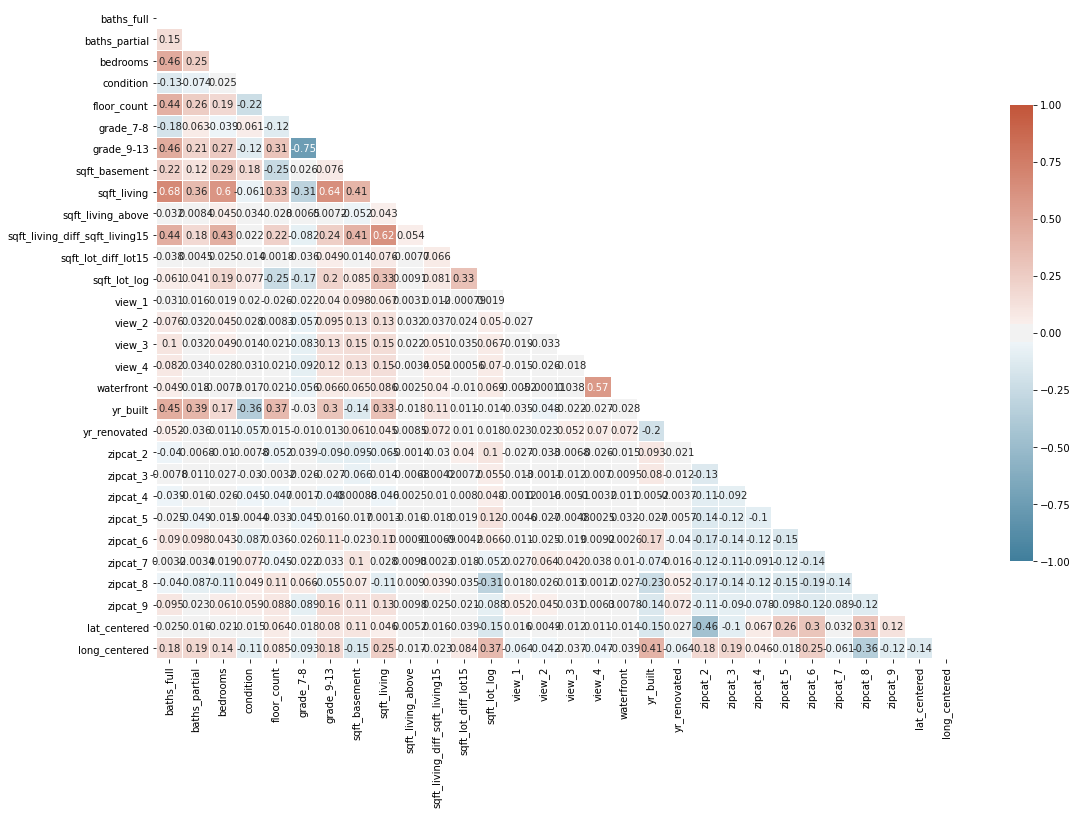

In [367]:
corr_heatmap(df2.drop('price', axis=1), figsize=(18,12))

In [368]:
zipcode_cat

id
7129300520    3
6414100192    6
5631500400    4
2487200875    7
1954400510    6
             ..
263000018     8
6600060120    3
1523300141    7
291310100     6
1523300157    7
Name: zipcode, Length: 21258, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [369]:
## is there an intersection between sqft_living an zipcode?  (Will it help?)

df_lm = df2.copy()

df_lm['zipcode_cat'] = zipcode_cat

df_lm.head()

,baths_full,baths_partial,bedrooms,condition,floor_count,grade_7-8,grade_9-13,price,sqft_basement,sqft_living,sqft_living_above,sqft_living_diff_sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_4,zipcat_5,zipcat_6,zipcat_7,zipcat_8,zipcat_9,lat_centered,long_centered,zipcode_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,1.0,0.0,300000.0,0,2400,0,340,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.233791,0.000063,1
1200019,1.0,1.0,4,4,1,1.0,0.0,647500.0,900,2060,0,-530,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.115591,-0.136937,4
1200021,1.0,0.0,3,3,1,1.0,0.0,400000.0,0,1460,0,-790,22977,10.668955,0.0,0.0,0.0,0.0,0.0,1952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.116591,-0.132937,4
2800031,1.0,0.0,3,4,2,0.0,0.0,235000.0,420,1430,0,140,-2721,8.935772,0.0,0.0,0.0,0.0,0.0,1930,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.081691,-0.050937,2
3600057,2.0,0.0,4,3,1,1.0,0.0,402500.0,890,1650,0,170,0,8.161660,0.0,0.0,0.0,0.0,0.0,1951,2013.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020309,-0.079937,7


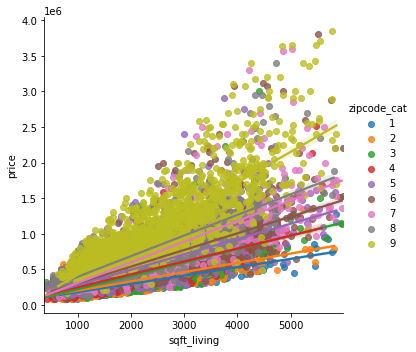

In [370]:
sns.lmplot(x='sqft_living', y='price', hue='zipcode_cat', data=df_lm)

In [371]:
df3 = df2.copy()
for col in df2.columns[df2.columns.str.startswith('zipcat_')]:
    df3[col+'_x_sqft_living'] = df3[col] * df3['sqft_living']
    df3 = df3.drop(col, axis=1)
    
df3 = df3.drop('sqft_living', axis=1)

df3.head(2)

,baths_full,baths_partial,bedrooms,condition,floor_count,grade_7-8,grade_9-13,price,sqft_basement,sqft_living_above,sqft_living_diff_sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,lat_centered,long_centered,zipcat_2_x_sqft_living,zipcat_3_x_sqft_living,zipcat_4_x_sqft_living,zipcat_5_x_sqft_living,zipcat_6_x_sqft_living,zipcat_7_x_sqft_living,zipcat_8_x_sqft_living,zipcat_9_x_sqft_living
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,1.0,0.0,300000.0,0,0,340,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,-0.233791,0.000063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200019,1.0,1.0,4,4,1,1.0,0.0,647500.0,900,0,-530,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,-0.115591,-0.136937,0.0,0.0,2060.0,0.0,0.0,0.0,0.0,0.0


In [374]:
X = df3.drop('price', axis=1)
y = df3['price']

display(quicktest(X, y, '9 (Multi colinearity -intersect sqft_lot zipcode)' ))
multicolinearity_check(df3.drop(columns=['price']))

{'r2_adjusted': 0.8257022921073598,
 'train_rmse': 139102.14710803566,
 'test_rmse': 140874.44383472524,
 'diff_rmse': 1772.2967266895866}

,vif
yr_built,233.218792
sqft_lot_log,175.211024
condition,31.505178
bedrooms,25.208774
floor_count,17.116017
baths_full,15.096441
grade_7-8,9.558040
grade_9-13,4.987296
zipcat_6_x_sqft_living,4.685699
baths_partial,4.356795


In [375]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.699509,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.700260,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.704186,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers),0.701567,182238.131325,183549.661787,1311.530462
4 (sqft_lot outliers and log),0.703781,181472.927762,182655.140851,1182.213089
5 (Floors -> floor count),0.703799,181493.263325,182664.700113,1171.436789
6 (View as categorical),0.705724,180879.513320,182175.450116,1295.936795
7 (Difference of lot and lot15),0.707028,180473.186782,181741.384707,1268.197925
8 (zipcodes as cats),0.818842,141630.913760,143196.139904,1565.226144
8 (zipcode bins),0.802005,148307.477206,149770.364430,1462.887224


# Model Assumptions

In [376]:
def visualize_assumptions(model, df):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
    
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax1);
    plt.gca()
    plt.title('QQ Plot')
    
    sns.distplot(model.resid, ax=ax2)
    plt.gca()
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    
    sns.scatterplot(x=model.predict(sm.add_constant(df)),
                    y=model.resid,
                    ax=ax3)
                    
    plt.gca()
    plt.title("Residual Plot")
    plt.ylabel('Residuals')
    plt.xlabel('Predicted Price')
    plt.axhline(0)
    
    plt.show()
    # JB test
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(pd.Series(test, index=name))

In [395]:
X = df3.drop('price', axis=1)
y = df3['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2284.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:52:43   Log-Likelihood:            -2.8549e+05
No. Observations:               21258   AIC:                         5.710e+05
Df Residuals:                   21228   BIC:                         5.713e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4.846e+05   1.27e+05     -3.815      0.000   -7.34e+05   -2.36e+05
baths_full                      8.672e+04   2445.197     35.466      0.000    8.19e+04    9.15e+04
baths_partial                   3.681e+04   2964.475     12.418      0.000     3.1e+04    4.26e+04
bedrooms                        1.199e+04   1631.701      7.350      0.000    8794.445    1.52e+04
condition                       2.165e+04   1936.425     11.183      0.000    1.79e+04    2.54e+04
floor_count                     8095.1364   2843.221      2.847      0.004    2522.207    1.37e+04
grade_7-8                       2.211e+04   4291.131      5.153      0.000    1.37e+04    3.05e+04
grade_9-13                      2.503e+05   5800.358     43.145      0.000    2.39e+05    2.62e+05
sqft_basement                      3.6994      3.614      1.024      0.306      -3.385      10.784
sqft_living_above                -47.3980     15.771     -3.005      0.003     -78.311     -16.485
sqft_living_diff_sqft_living15    44.0017      2.593     16.972      0.000      38.920      49.083
sqft_lot_diff_lot15               -0.2647      0.061     -4.320      0.000      -0.385      -0.145
sqft_lot_log                    5.945e+04   1725.449     34.453      0.000    5.61e+04    6.28e+04
view_1                          1.223e+05   9375.275     13.042      0.000    1.04e+05    1.41e+05
view_2                          1.006e+05   5681.055     17.706      0.000    8.95e+04    1.12e+05
view_3                          1.883e+05   7817.811     24.092      0.000    1.73e+05    2.04e+05
view_4                          4.146e+05    1.2e+04     34.549      0.000    3.91e+05    4.38e+05
waterfront                      4.662e+05   1.74e+04     26.816      0.000    4.32e+05       5e+05
yr_built                         -54.7940     62.096     -0.882      0.378    -176.507      66.919
yr_renovated                      20.1189      3.286      6.123      0.000      13.678      26.559
lat_centered                    1.041e+05   1.61e+04      6.478      0.000    7.26e+04    1.36e+05
long_centered                   5.989e+04   1.09e+04      5.480      0.000    3.85e+04    8.13e+04
zipcat_2_x_sqft_living          3637.7983    660.024      5.512      0.000    2344.101    4931.496
zipcat_3_x_sqft_living           1.28e+04    813.000     15.744      0.000    1.12e+04    1.44e+04
zipcat_4_x_sqft_living          1.314e+04    939.629     13.989      0.000    1.13e+04     1.5e+04
zipcat_5_x_sqft_living          2.034e+04    968.338     21.005      0.000    1.84e+04    2.22e+04
zipcat_6_x_sqft_living          2.804e+04    948.135     29.573      0.000    2.62e+04    2.99e+04
zipcat_7_x_sqft_living          3.794e+04    879.308     43.142      0.000    3.62e+04    3.97e+04
zipcat_8_x_sqf

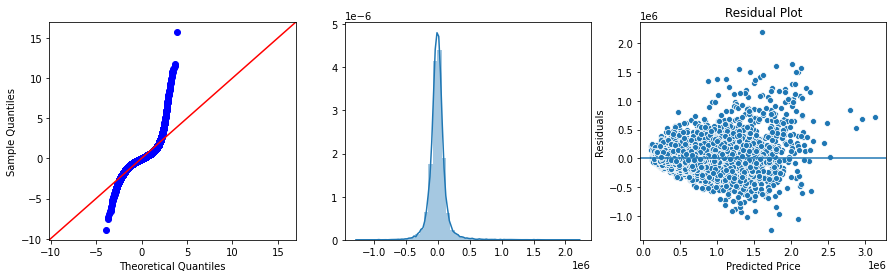

Jarque-Bera    458157.873267
Prob                0.000000
Skew                2.028896
Kurtosis           25.378304
dtype: float64


In [378]:
visualize_assumptions(model, X)

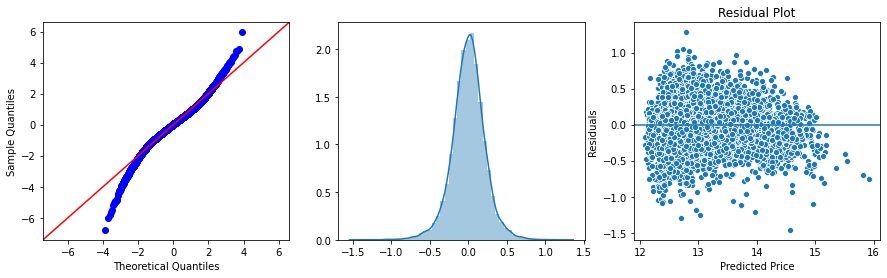

Jarque-Bera    3180.740083
Prob              0.000000
Skew             -0.191606
Kurtosis          4.855846
dtype: float64


In [379]:
X = df3.drop('price', axis=1)
y = np.log(df3['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()

visualize_assumptions(model, X)

In [380]:
sorted(df3.columns)

['baths_full',
 'baths_partial',
 'bedrooms',
 'condition',
 'floor_count',
 'grade_7-8',
 'grade_9-13',
 'lat_centered',
 'long_centered',
 'price',
 'sqft_basement',
 'sqft_living_above',
 'sqft_living_diff_sqft_living15',
 'sqft_lot_diff_lot15',
 'sqft_lot_log',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'zipcat_2_x_sqft_living',
 'zipcat_3_x_sqft_living',
 'zipcat_4_x_sqft_living',
 'zipcat_5_x_sqft_living',
 'zipcat_6_x_sqft_living',
 'zipcat_7_x_sqft_living',
 'zipcat_8_x_sqft_living',
 'zipcat_9_x_sqft_living']

In [387]:
# non zero sqft

to_log = ['price',
         'zipcat_2_x_sqft_living',
         'zipcat_3_x_sqft_living',
         'zipcat_4_x_sqft_living',
         'zipcat_5_x_sqft_living',
         'zipcat_6_x_sqft_living',
         'zipcat_7_x_sqft_living',
         'zipcat_8_x_sqft_living',
         'zipcat_9_x_sqft_living']

to_log

['price',
 'zipcat_2_x_sqft_living',
 'zipcat_3_x_sqft_living',
 'zipcat_4_x_sqft_living',
 'zipcat_5_x_sqft_living',
 'zipcat_6_x_sqft_living',
 'zipcat_7_x_sqft_living',
 'zipcat_8_x_sqft_living',
 'zipcat_9_x_sqft_living']

In [390]:
df3 = df2.copy()
for col in df2.columns[df2.columns.str.startswith('zipcat_')]:
    df3[col+'_x_sqft_living'] = df3[col] * np.log(df3['sqft_living'])
    df3 = df3.drop(col, axis=1)
    
df3 = df3.drop('sqft_living', axis=1)

df3.head(2)


,baths_full,baths_partial,bedrooms,condition,floor_count,grade_7-8,grade_9-13,price,sqft_basement,sqft_living_above,sqft_living_diff_sqft_living15,sqft_lot_diff_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,waterfront,yr_built,yr_renovated,lat_centered,long_centered,zipcat_2_x_sqft_living,zipcat_3_x_sqft_living,zipcat_4_x_sqft_living,zipcat_5_x_sqft_living,zipcat_6_x_sqft_living,zipcat_7_x_sqft_living,zipcat_8_x_sqft_living,zipcat_9_x_sqft_living
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,3.0,0.0,6,3,2,1.0,0.0,300000.0,0,0,340,2057,9.145588,0.0,0.0,0.0,0.0,0.0,1991,0.0,-0.233791,0.000063,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1200019,1.0,1.0,4,4,1,1.0,0.0,647500.0,900,0,-530,4145,10.167235,0.0,0.0,0.0,0.0,0.0,1947,0.0,-0.115591,-0.136937,0.0,0.0,7.630461,0.0,0.0,0.0,0.0,0.0


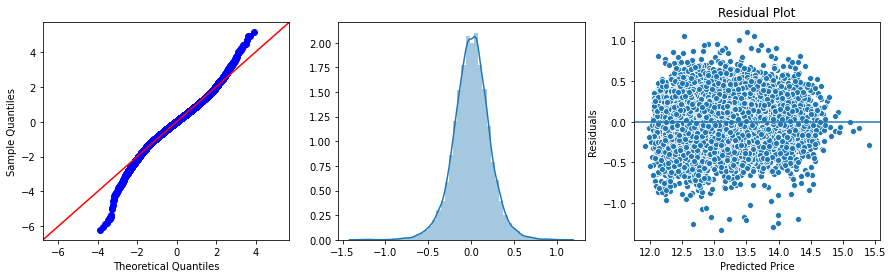

Jarque-Bera    2447.011234
Prob              0.000000
Skew             -0.161330
Kurtosis          4.630501
dtype: float64


In [393]:
X = df3.drop('price', axis=1)
y = np.log(df3['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()

visualize_assumptions(model, X)